# Spotify 個人化推薦系統

In [1]:
# 掛載 Google Drive
from google.colab import drive
drive.mount('/content/drive')
import os

# 掛載成功後，您的 Google Drive 內容將會出現在 /content/drive/MyDrive 路徑下
# 例如，如果您的檔案在 Drive 根目錄的 'my_data.csv'
# 您可以這樣讀取它：

path_dataset_with_text = '/content/drive/MyDrive/資料探勘/final/dataset_with_text.xlsx'
path_spotify_semantic_mapped = '/content/drive/MyDrive/資料探勘/final/spotify_semantic_mapped.csv'
path_persona_listening_histories = '/content/drive/MyDrive/資料探勘/final/persona_listening_histories'

print(f"參數 'path_dataset_with_text' 已定義: {path_dataset_with_text}")
print(f"參數 'path_spotify_semantic_mapped' 已定義: {path_spotify_semantic_mapped}")
print(f"參數 'path_persona_listening_histories' 已定義: {path_persona_listening_histories}")

# 檢查檔案是否存在
if os.path.exists(path_dataset_with_text):
    print(f"檔案 '{path_dataset_with_text}' 存在。")
else:
    print(f"檔案 '{path_dataset_with_text}' 不存在。請檢查路徑或檔案名稱。")

if os.path.exists(path_spotify_semantic_mapped):
    print(f"檔案 '{path_spotify_semantic_mapped}' 存在。")
else:
    print(f"檔案 '{path_spotify_semantic_mapped}' 不存在。請檢查路徑或檔案名稱。")

# 檢查 persona_listening_histories 目錄是否存在
if os.path.exists(path_persona_listening_histories):
    print(f"目錄 '{path_persona_listening_histories}' 存在。")
else:
    print(f"目錄 '{path_persona_listening_histories}' 不存在。請檢查路徑或手動建立。")

Mounted at /content/drive
參數 'path_dataset_with_text' 已定義: /content/drive/MyDrive/資料探勘/final/dataset_with_text.xlsx
參數 'path_spotify_semantic_mapped' 已定義: /content/drive/MyDrive/資料探勘/final/spotify_semantic_mapped.csv
參數 'path_persona_listening_histories' 已定義: /content/drive/MyDrive/資料探勘/final/persona_listening_histories
檔案 '/content/drive/MyDrive/資料探勘/final/dataset_with_text.xlsx' 存在。
檔案 '/content/drive/MyDrive/資料探勘/final/spotify_semantic_mapped.csv' 存在。
目錄 '/content/drive/MyDrive/資料探勘/final/persona_listening_histories' 存在。


## 探索性資料分析 (EDA)

### 載入資料

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.17M/8.17M [00:00<00:00, 34.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1


### 了解資料的概況與潛在問題

In [3]:
import pandas as pd
import os

# The 'path' variable should contain the directory where the dataset was downloaded.
# As per the previous cell's output, 'path' is '/kaggle/input/-spotify-tracks-dataset'.
# We need to find the actual CSV file within this directory.
# A common name for the CSV file in Kaggle datasets is 'Spotify_Tracks.csv' or similar.

dataset_dir = path # Reusing the 'path' variable from the previous cell
csv_file_name = 'dataset.csv' # Assuming this is the main CSV file name
full_csv_path = os.path.join(dataset_dir, csv_file_name)

try:
    # Load the dataset
    df = pd.read_csv(full_csv_path)
    print(f"Dataset '{csv_file_name}' loaded successfully from {full_csv_path}\n")

    print("### 1. Displaying the first 5 rows of the DataFrame ###")
    print(df.head())
    print("\n")

    print("### 2. Displaying DataFrame information (data types, non-null counts) ###")
    df.info()
    print("\n")

    print("### 3. Displaying descriptive statistics ###")
    print(df.describe())
    print("\n")

    print("### 4. Checking for missing values ###")
    print(df.isnull().sum())
    print("\n")

    print("### 5. Checking for duplicate rows ###")
    print(f"Number of duplicate rows: {df.duplicated().sum()}\n")

except FileNotFoundError:
    print(f"Error: '{csv_file_name}' not found in '{dataset_dir}'. Please verify the file name and path.")
except Exception as e:
    print(f"An error occurred during EDA: {e}")

Dataset 'dataset.csv' loaded successfully from /root/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1/dataset.csv

### 1. Displaying the first 5 rows of the DataFrame ###
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0     

**資料的潛在問題與後續需要注意的部分**
1. duration_ms 最大值異常偏大
2. loudness（音量）最小值過低
3.  key、time_signature 出現 0，屬不可能的節拍（歌曲不會是 0 拍）
4. instrumentalness 分布非常偏斜，多數歌曲接近 0，
少部分到 1， 在模型訓練時，這類高度偏態特徵可能需要 log transform 或分箱處理（但請評估需求）
5. track_genre 欄位需要進一步探索，目前看不出：類別數量、是否有子分類格式不一致、是否偏向某些類型



### Exploring 'track_genre' column ###

Number of unique track genres: 114

Unique track genres:

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'

/tmp/ipython-input-3062273774.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['track_genre'], order=df['track_genre'].value_counts().index[:20], palette='viridis')


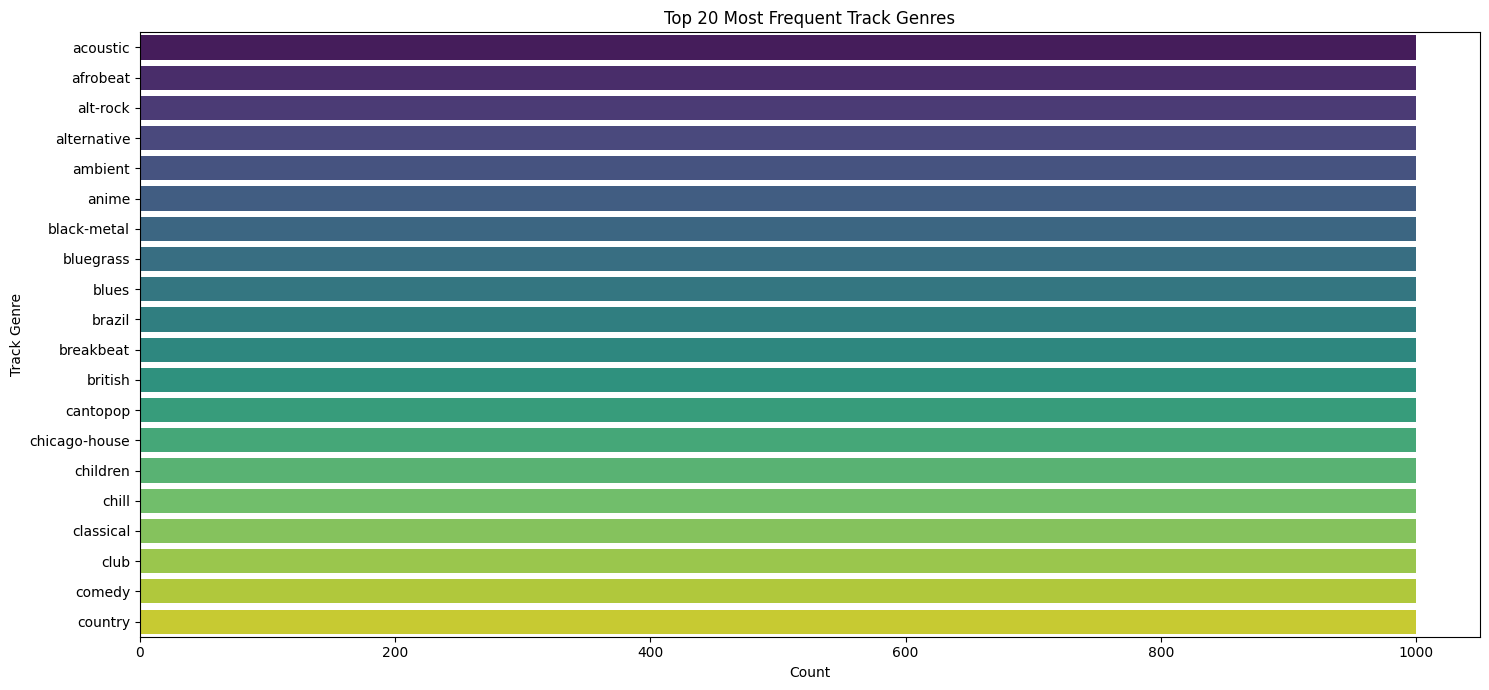

In [4]:
print("### Exploring 'track_genre' column ###\n")

# 1. Check the number of unique genres
unique_genres = df['track_genre'].nunique()
print(f"Number of unique track genres: {unique_genres}\n")

# 2. Display all unique genres to check for inconsistencies
print("Unique track genres:\n")
print(df['track_genre'].unique())
print("\n")

# 3. Check the distribution of genres (top 20 and bottom 20 to see skewness)
print("Top 20 most frequent track genres:\n")
print(df['track_genre'].value_counts().head(20))
print("\n")

print("Bottom 20 least frequent track genres:\n")
print(df['track_genre'].value_counts().tail(20))
print("\n")

# Optional: Visualize the genre distribution (e.g., using a bar plot for top N genres)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.countplot(y=df['track_genre'], order=df['track_genre'].value_counts().index[:20], palette='viridis')
plt.title('Top 20 Most Frequent Track Genres')
plt.xlabel('Count')
plt.ylabel('Track Genre')
plt.tight_layout()
plt.show()

track_genre刻意「平均分層」採樣，每個 genre 都被放入 1000 筆資料。

### 數值型特徵: 畫出 Boxplot (箱型圖) 與 Histogram (直方圖)
    ◦ 系統價值：您會發現某些特徵（如 liveness 或 speechiness）是極度**右偏（Right-skewed）**的——即大部分歌曲分數很低，只有少數很高。
    ◦ 決策：這告訴您哪些特徵需要進行「Log Transform」或「Box-Cox」，否則計算餘弦相似度時，這些特徵會被忽略或造成誤導。

/tmp/ipython-input-3856087150.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[feature], palette='viridis')
/tmp/ipython-input-3856087150.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], kde=True, palette='viridis')
/tmp/ipython-input-3856087150.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[feature], palette='viridis')
/tmp/ipython-input-3856087150.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[feature], kde=True, palette='viridis')
/tmp/ipython-input-3856087150.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

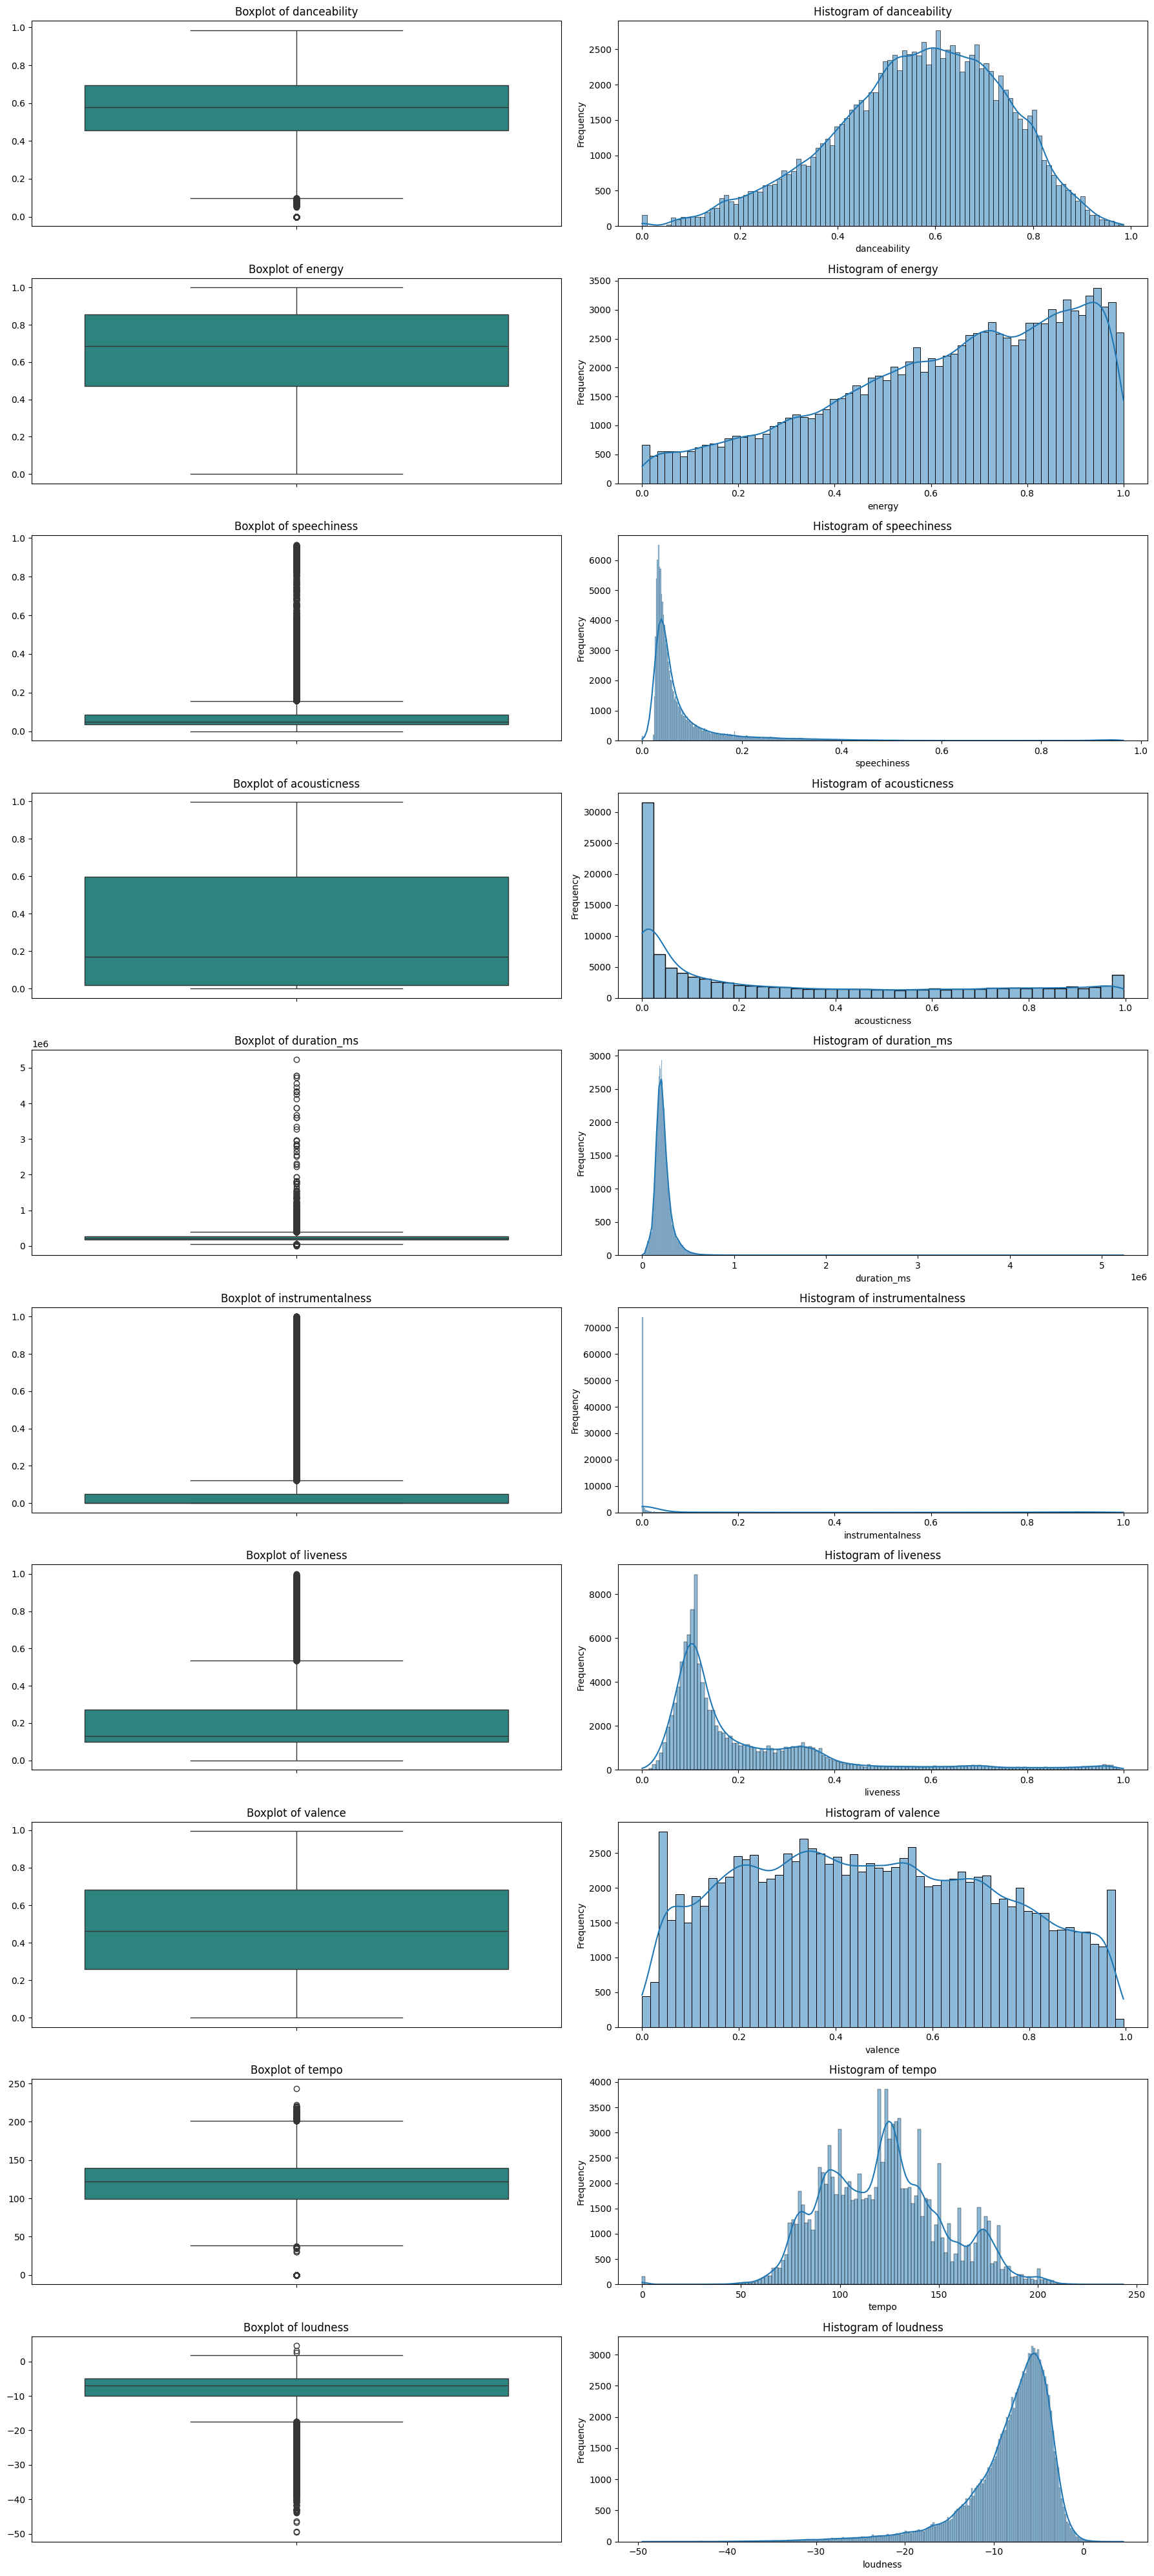

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features for plotting based on the previous EDA and instructions
features_to_plot = [
    'danceability', 'energy', 'speechiness', 'acousticness', 'duration_ms',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness'
]

plt.figure(figsize=(18, 4 * len(features_to_plot)))

for i, feature in enumerate(features_to_plot):
    # Create a subplot for each feature with 2 columns (boxplot and histogram)
    plt.subplot(len(features_to_plot), 2, 2 * i + 1)
    sns.boxplot(y=df[feature], palette='viridis')
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('') # Hide y-label for boxplot as it's redundant with histogram

    plt.subplot(len(features_to_plot), 2, 2 * i + 2)
    sns.histplot(df[feature], kde=True, palette='viridis')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1. danceability（可跳性）: 建議 標準化（Standardization）
2. energy（能量）: 標準化即可
3. speechiness（語音比例）: 如果不做縮放，餘弦相似度會幾乎忽略此特徵，因為大多數值都是接近 0，彼此差異極小，log transform 做平滑（但要加常數避免 log(0)）
4. acousticness（原音風格）: 如果不用縮放，cosine similarity 會把 acousticness 變成反應最明顯的特徵之一，建議加上MinMax Scaling
5. duration_ms（歌曲長度）: 因為數字範圍太大，cosine similarity 會讓 duration_ms 成為主導特徵，建議log transform後，再做標準化
6. instrumentalness（純音樂比例）: 非常稀疏的特徵，cosine similarity 會幾乎無法利用此值，做二值化：instrumentalness > 0.5 → instrumental track（視需求）
7. liveness（現場感）: 分布不均會降低辨識度，做MinMax Scaling
8. valence（情緒正向度）: 近似均勻分布，標準化就好
9. tempo（BPM）: 多峰分布不適合做一般 normalization 直接使用，clip → 去除不合理 BPM（如 <40 或 >220），再做標準化
10. loudness（音量）: 如果保留這些極端負值，cosine similarity 會因 loudness 而受污染，clip → 去除 < -30 dB 的極端值，標準化

### 類別型特徵: 計數圖 (Countplot) 或 長條圖 (Bar Plot)

/tmp/ipython-input-183486030.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')
/tmp/ipython-input-183486030.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')
/tmp/ipython-input-183486030.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')


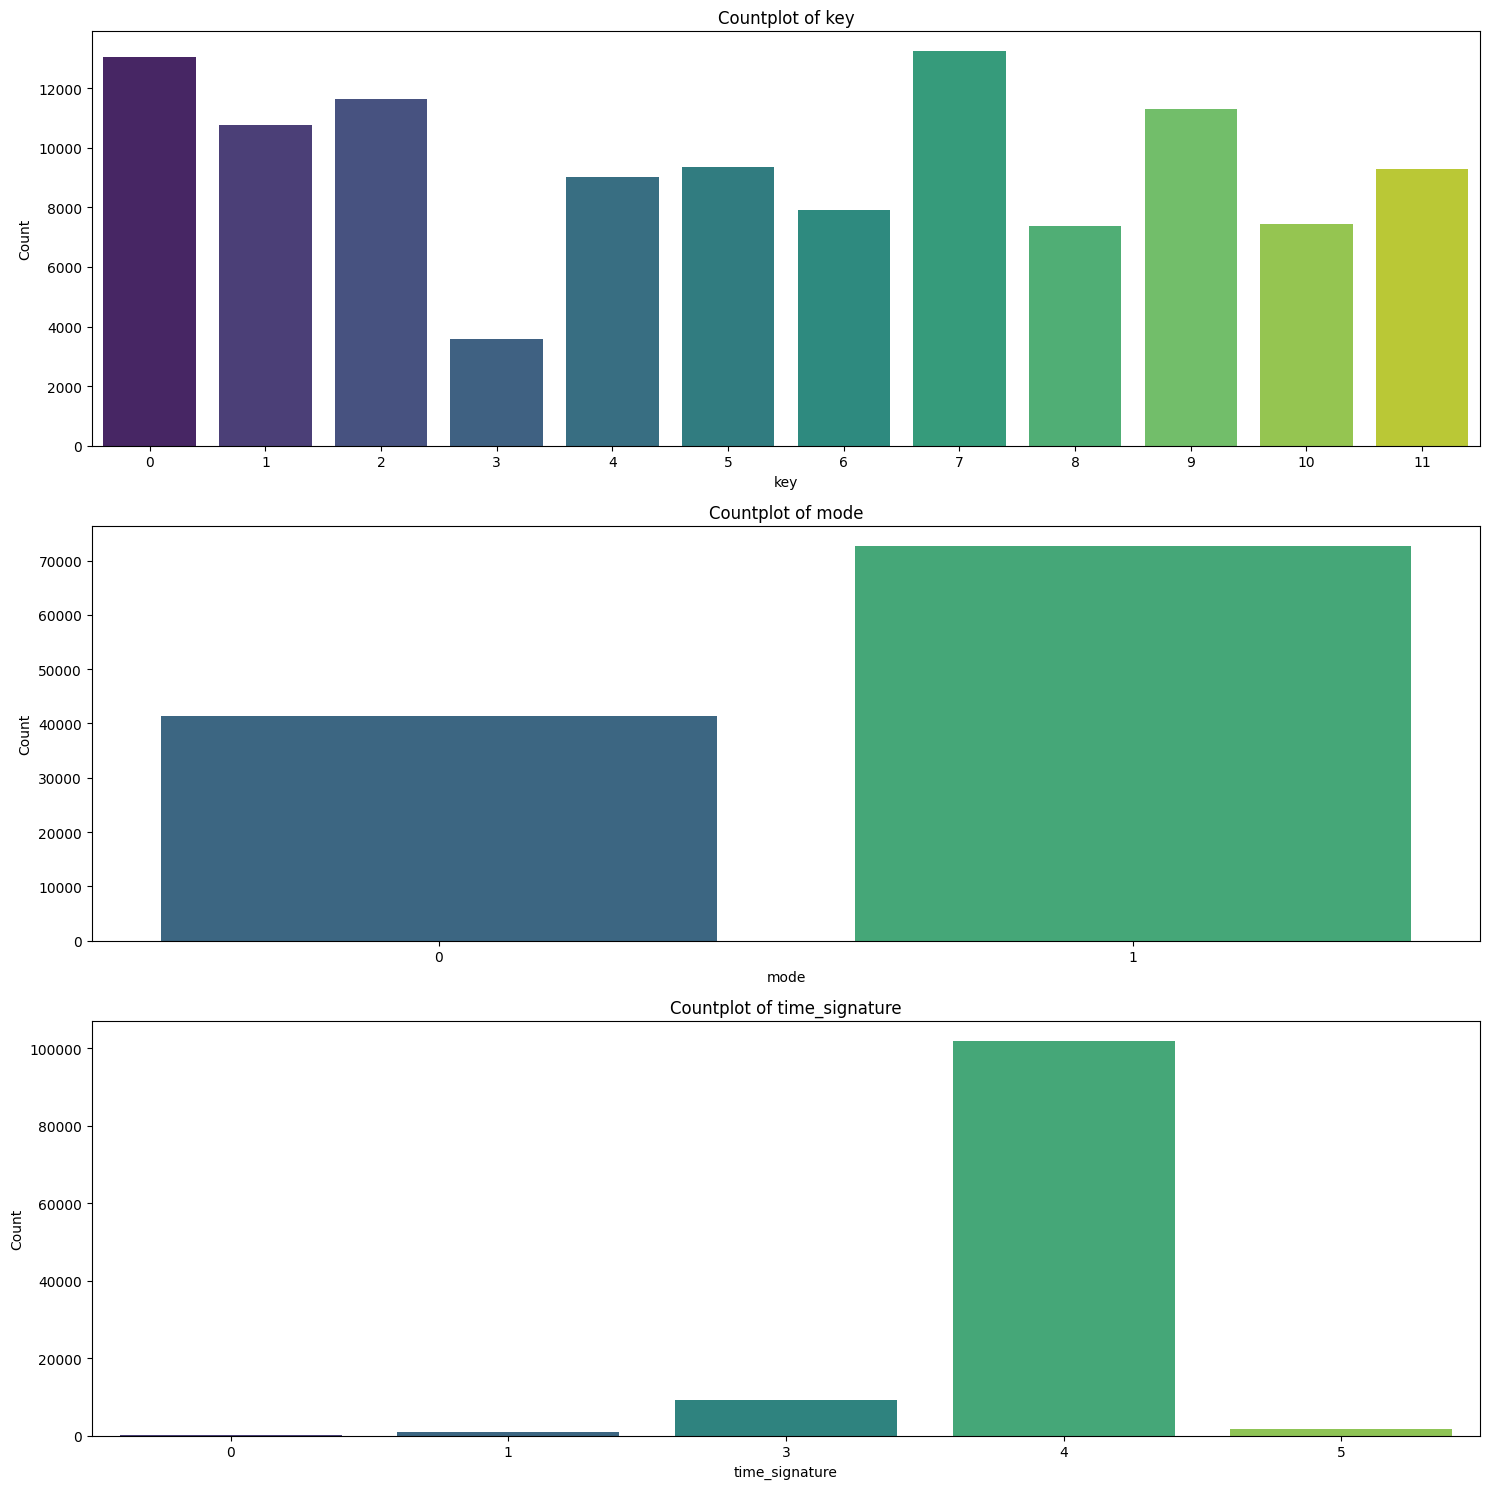

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['key', 'mode', 'time_signature']

plt.figure(figsize=(15, 5 * len(categorical_features)))

for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i + 1)
    sns.countplot(x=df[feature], palette='viridis')
    plt.title(f'Countplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

1. Key（音樂的調性）: Cosine similarity 會把 key 當成“連續距離”來比較，音樂 key 傳統是 循環（cyclic）變數，將 key 轉成 sin/cos 週期編碼（cyclic encoding），刪除原本的 key 數字欄位
2. Mode（調式：大調或小調）: 0 與 1 的距離會被直接當成「差 1」，保持 0/1，但在 cosine similarity 前做標準化
3. Time Signature（拍號）: 0 是不可能的拍號 → 這是異常值，time_signature 是類別，不是連續數字，因為 4/4 佔比太高，cosine similarity 會忽略此欄位（因為大部分資料都一樣），將非法值（0）移除或填為 4，將 time_signature 轉成 One-Hot Encoding



### 做 Correlation Matrix (熱力圖) 分析特徵關聯

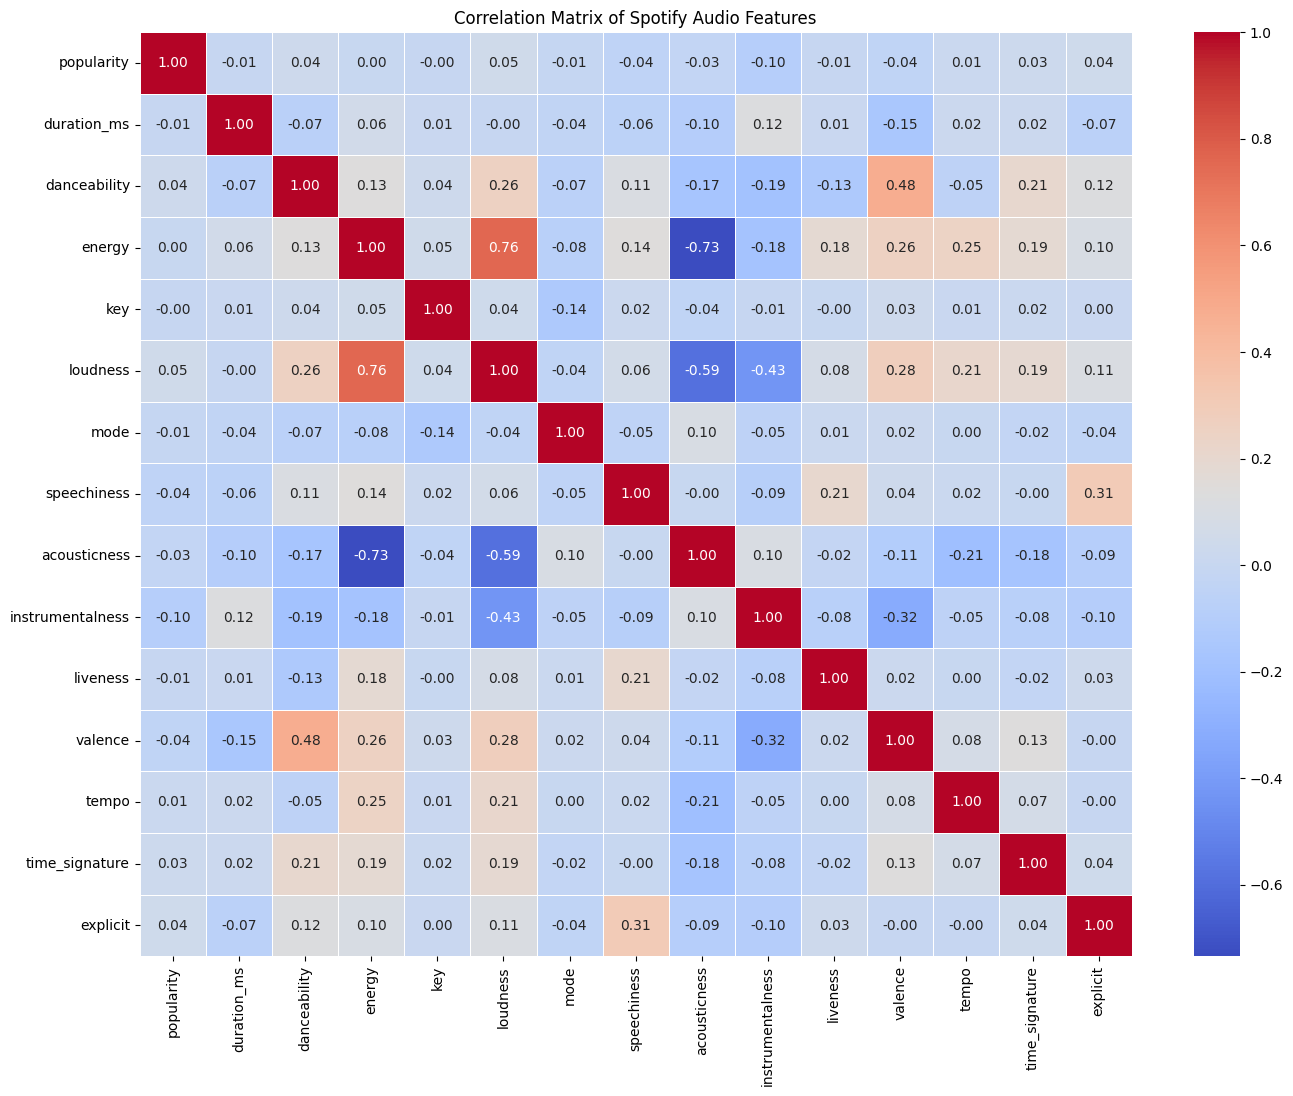

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical and boolean columns for correlation analysis
# Exclude 'Unnamed: 0' and 'track_id' as they are identifiers
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()

# Combine and filter out identifier columns
features_for_corr = [col for col in numerical_cols + bool_cols if col not in ['Unnamed: 0', 'track_id']]

# Create a temporary DataFrame for correlation to convert 'explicit' boolean to int
df_corr = df[features_for_corr].copy()
for col in bool_cols:
    if col in df_corr.columns:
        df_corr[col] = df_corr[col].astype(int)

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Spotify Audio Features')
plt.show()

1. Loudness（音量） vs Energy（能量） → +0.76（非常強正相關），音量越大 → 能量越強，能量越強 → 音量越大
2. Acousticness vs Energy → -0.73（強負相關），越原音的歌（acoustic）→ energy 越低，energy 越高 → acousticness 越低
3. Acousticness vs Loudness → -0.59（明顯負相關），原音歌曲通常錄得比較「安靜」或自然響度偏低
4. Danceability vs Valence → +0.48，歌越有節奏感（danceable）→ 情緒越正向（valence）
5. Energy vs Valence → +0.26，越 energetic 的歌，情緒通常越 bright，但相關不強，表示很多 high-energy 歌其實也偏悲（ex: rock 或 metal）
6. Instrumentalness vs Loudness → -0.43: 越偏純音樂（instrumental）→ loudness 越低
7. Danceability vs Loudness → +0.26: 越 loud 的歌通常編曲偏鼓動、節奏感強
8. 關於 Popularity（熱門程度）: popularity 和其他任何特徵相關性都接近 0，代表熱門程度跟音訊特徵幾乎無關



1. Cosine Similarity 特徵需標準化: 因為特徵彼此尺度差異大，如：loudness（-50～0）、tempo（40～220）、danceability（0～1），不標準化會造成某些特徵主導相似度。
2. Energy + Loudness 是同質特徵: 若模型對梯度或特徵相關敏感（如線性模型、cluster）→ 需要避免多重共線性→ 可只保留一者，或同時保留但做 PCA。
3. Acousticness 與 Loudness/Energy 呈現互補特性: 有助於分辨：quiet acoustic songs high-energy EDM，很適合做歌曲分群（clustering）。
4. Popularity 不適合作為推薦系統特徵: 因為與音訊特徵完全不相關，放入相似度模型會造成噪音。

## 第一層：資料預處理與特徵工程 (Data Layer)
目標：將原始 CSV 轉化為 RAG 可用的高品質向量與自然語言描述。此層最為關鍵，直接影響推薦品質。

### 1. 基礎資料清洗 & 特徵數值轉換

```
欄位名稱,欄位含意,處理方式
Unname,,刪除
track_id,該歌曲在 Spotify 上的唯一識別碼,
artists,演出者名稱。若有多位藝術家，會以分號 ; 分隔,
album_name          ,歌曲所屬的專輯名稱,
track_name,歌曲名稱,
popularity,受歡迎程度（0 到 100）。數值越高代表越受歡迎。此數值由演算法計算，主要依據播放總次數以及播放的「近期程度」（越近期的播放權重越高）,
duration_ms         ,歌曲長度，單位為毫秒 (ms)。,移除 > 10 分鐘離群值 log transform 標準化
explicit,是否包含限制級（Explicit）歌詞。True 為是，False 為否或未知,
danceability,0.0（最不適合跳舞）到 1.0（最適合跳舞）。綜合考量了速度、節奏穩定性、節拍強度等元素。,Standardization（z-score 標準化）
energy,0.0 到 1.0。代表強度與活動力。高能量的歌曲通常感覺快、大聲且嘈雜（如死亡金屬）；低能量則如巴哈的前奏曲。,Standardization（z-score 標準化）
key,"歌曲的調。使用整數映射音高（Pitch Class notation）。例如 0 = C, 1 = C♯/D♭, 2 = D...以此類推。若未偵測到則為 -1。",使用 sin/cos 週期編碼
loudness,歌曲的整體響度，單位為分貝 (dB)。,clip（< -30 dB 移除或修正） 標準化
mode,大調或小調。1 代表大調 (Major)，0 代表小調 (Minor)。,保留 0/1，但需標準化
speechiness,偵測歌曲中是否有說話聲。,log transform（需 log(x+1)）
acousticness,0.0 到 1.0。信賴度指標，數值越高代表越確信這首歌是原音（Acoustic）而非電子合成的。,MinMax Scaling
instrumentalness,"預測歌曲是否「沒有人聲」。越接近 1.0 代表越可能是純音樂。需注意 ""Ooh"" 和 ""aah"" 視為器樂，而 Rap 或口白視為人聲。",二值化（instrumentalness > 0.5 → pure instrumental）
liveness,偵測錄音中是否有觀眾存在的聲音。若大於 0.8，極高機率是現場演出錄音 (Live)。,MinMax Scaling
valence,0.0 到 1.0。描述歌曲傳達的音樂正向性。高數值代表正向情緒（快樂、愉悅、欣快）；低數值代表負向情緒（悲傷、沮喪、憤怒）。,Standardization（z-score 標準化）
tempo,歌曲整體的預估速度，單位為 BPM (Beats Per Minute)。,Clip 範圍（40–220 BPM） 標準化
time_signature,預估的拍號，表示每一小節有幾拍。範圍從 3 到 7（代表 3/4 拍到 7/4 拍）。,將非法值（0）移除或填為 4 One-Hot Encoding（3/4、4/4、其他）
track_genre,歌曲所屬的曲風流派,
```


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a copy of the original DataFrame to perform transformations
df_processed = df.copy()

# 1. Unnamed: 0 - 刪除
if 'Unnamed: 0' in df_processed.columns:
    df_processed = df_processed.drop('Unnamed: 0', axis=1)

# Handle missing values for artists, album_name, track_name
# Given the small number of missing values (1 each), dropping them is a simple approach.
# For a production system, more sophisticated imputation might be considered.
df_processed.dropna(subset=['artists', 'album_name', 'track_name'], inplace=True)

# Ensure 'explicit' is integer (True=1, False=0)
df_processed['explicit'] = df_processed['explicit'].astype(int)

# --- Numerical Feature Transformations ---

# duration_ms (歌曲長度，單位為毫秒 (ms)。移除 > 10 分鐘離群值 log transform 標準化)
# 10 minutes = 10 * 60 * 1000 ms = 600000 ms
df_processed = df_processed[df_processed['duration_ms'] <= 600000]
# Apply log1p transform to handle potential skewness and make it positive for log
df_processed['duration_ms_log'] = np.log1p(df_processed['duration_ms'])
scaler = StandardScaler()
df_processed['duration_ms_scaled'] = scaler.fit_transform(df_processed[['duration_ms_log']])
df_processed = df_processed.drop(['duration_ms', 'duration_ms_log'], axis=1) # Drop original and intermediate log column

# loudness (歌曲的整體響度，單位為分貝 (dB)。clip（< -30 dB 移除或修正） 標準化)
df_processed['loudness_clipped'] = df_processed['loudness'].clip(lower=-30)
scaler = StandardScaler()
df_processed['loudness_scaled'] = scaler.fit_transform(df_processed[['loudness_clipped']])
df_processed = df_processed.drop(['loudness', 'loudness_clipped'], axis=1)

# tempo (歌曲整體的預估速度，單位為 BPM。Clip 範圍（40–220 BPM） 標準化)
df_processed['tempo_clipped'] = df_processed['tempo'].clip(lower=40, upper=220)
scaler = StandardScaler()
df_processed['tempo_scaled'] = scaler.fit_transform(df_processed[['tempo_clipped']])
df_processed = df_processed.drop(['tempo', 'tempo_clipped'], axis=1)

# danceability, energy, valence (Standardization（z-score 標準化）)
for col in ['danceability', 'energy', 'valence']:
    scaler = StandardScaler()
    df_processed[f'{col}_scaled'] = scaler.fit_transform(df_processed[[col]])
    df_processed = df_processed.drop(col, axis=1)

# speechiness (偵測歌曲中是否有說話聲。log transform（需 log(x+1)） 標準化)
df_processed['speechiness_log'] = np.log1p(df_processed['speechiness'])
scaler = StandardScaler()
df_processed['speechiness_scaled'] = scaler.fit_transform(df_processed[['speechiness_log']])
df_processed = df_processed.drop(['speechiness', 'speechiness_log'], axis=1)

# acousticness, liveness (MinMax Scaling)
for col in ['acousticness', 'liveness']:
    scaler = MinMaxScaler()
    df_processed[f'{col}_scaled'] = scaler.fit_transform(df_processed[[col]])
    df_processed = df_processed.drop(col, axis=1)

# instrumentalness (二值化（instrumentalness > 0.5 → pure instrumental）)
df_processed['instrumentalness_binary'] = (df_processed['instrumentalness'] > 0.5).astype(int)
df_processed = df_processed.drop('instrumentalness', axis=1)

# --- Categorical Feature Transformations ---

# key (歌曲的調。使用 sin/cos 週期編碼)
df_processed['key_sin'] = np.sin(2 * np.pi * df_processed['key'] / 12)
df_processed['key_cos'] = np.cos(2 * np.pi * df_processed['key'] / 12)
df_processed = df_processed.drop('key', axis=1)

# mode (大調或小調。保留 0/1，但需標準化)
# Mode is already 0/1. Standardizing it for consistency with other scaled features.
scaler = StandardScaler()
df_processed['mode_scaled'] = scaler.fit_transform(df_processed[['mode']])
df_processed = df_processed.drop('mode', axis=1)

# time_signature (將非法值（0）移除或填為 4 One-Hot Encoding（3/4、4/4、其他）)
# Replace 0 with 4 (most common and reasonable default for a 0 value)
df_processed['time_signature'] = df_processed['time_signature'].replace(0, 4)
# One-Hot Encode
df_processed = pd.get_dummies(df_processed, columns=['time_signature'], prefix='time_signature')


# Display the first few rows and info of the processed DataFrame
print("### Processed DataFrame Head ###")
print(df_processed.head())
print("\n### Processed DataFrame Info ###")
df_processed.info()

### Processed DataFrame Head ###
                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  explicit track_genre  \
0                      Comedy          73         0    acoustic   
1            Ghost - Acoustic          55         0    acoustic   
2              To Begin Again          57         0    acoustic   
3  Can't Help Falling In Love          71  

### 2. PCA (主成分分析)


Explained Variance Ratio per Principal Component:
Principal Component 1: 0.2419
Principal Component 2: 0.1455
Principal Component 3: 0.1110
Principal Component 4: 0.1104
Principal Component 5: 0.0920
Principal Component 6: 0.0818
Principal Component 7: 0.0581
Principal Component 8: 0.0512
Principal Component 9: 0.0469
Principal Component 10: 0.0260
Principal Component 11: 0.0142
Principal Component 12: 0.0093
Principal Component 13: 0.0048
Principal Component 14: 0.0032
Principal Component 15: 0.0025
Principal Component 16: 0.0011
Principal Component 17: 0.0000


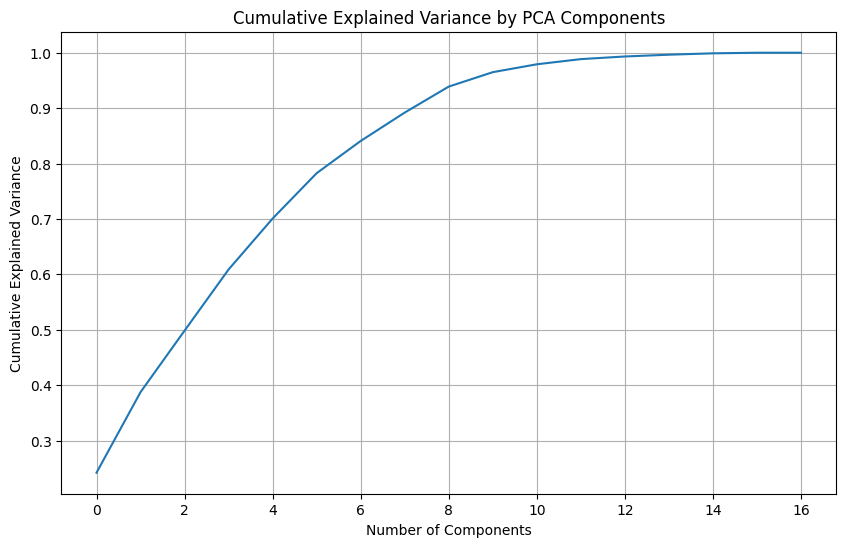


### Transformed DataFrame (first 5 rows) with PCA components and metadata ###
                 track_id                  track_name                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV                      Comedy             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ghost - Acoustic            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b              To Begin Again  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx  Can't Help Falling In Love            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K                     Hold On        Chord Overstreet   

                                          album_name track_genre  popularity  \
0                                             Comedy    acoustic          73   
1                                   Ghost (Acoustic)    acoustic          55   
2                                     To Begin Again    acoustic          57   
3  Crazy Rich Asians (Original Motion Picture Sou...    acoustic          71   
4                                 

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical features for PCA from df_processed
# Exclude identifiers and categorical columns that are not scaled numerical features
features_for_pca = df_processed.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove non-feature columns (like track_id, popularity, explicit, track_genre, binary instrumentalness if it's treated as a single feature)
# We'll keep popularity if we want to include it in the recommendation, but for pure audio features, we might exclude it from PCA.
# For now, let's exclude original identifiers and explicitly non-scaled numericals that might bias PCA if not treated correctly

# Assuming scaled features end with '_scaled', and cyclic encoded keys are 'key_sin'/'key_cos'
# and one-hot encoded time_signature are 'time_signature_X'

# Collect all the processed numerical features that represent audio characteristics
pca_features = [
    'duration_ms_scaled', 'loudness_scaled', 'tempo_scaled',
    'danceability_scaled', 'energy_scaled', 'valence_scaled',
    'speechiness_scaled', 'acousticness_scaled', 'liveness_scaled',
    'instrumentalness_binary', 'key_sin', 'key_cos', 'mode_scaled',
    # time_signature one-hot encoded columns
    'time_signature_1', 'time_signature_3', 'time_signature_4', 'time_signature_5'
]

# Filter out any features that might not exist in the current df_processed (e.g., if one-hot encoding didn't produce all possible time_signature columns)
pca_features = [f for f in pca_features if f in df_processed.columns]

X_pca = df_processed[pca_features]

# Initialize PCA
pca = PCA(n_components=None) # n_components=None will keep all components
pca.fit(X_pca)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio per Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Transform the data using PCA
X_pca_transformed = pca.transform(X_pca)
df_pca = pd.DataFrame(X_pca_transformed, columns=[f'PC_{i+1}' for i in range(X_pca_transformed.shape[1])])

# Optionally, you can add some of the original metadata back to df_pca if needed
# For example, track_id, track_name, artists, album_name, track_genre, popularity
metadata_cols = ['track_id', 'track_name', 'artists', 'album_name', 'track_genre', 'popularity']
# Ensure these columns exist before trying to merge
metadata_cols = [col for col in metadata_cols if col in df_processed.columns]

# Reset index of df_processed to ensure proper alignment for merge
df_processed_reset = df_processed.reset_index(drop=True)

df_pca = pd.concat([df_processed_reset[metadata_cols], df_pca], axis=1)

print("\n### Transformed DataFrame (first 5 rows) with PCA components and metadata ###")
print(df_pca.head())
print("\n### Transformed DataFrame Info ###")
df_pca.info()

# Print the loading matrix (pca.components_)
print("\n### PCA Loading Matrix (pca.components_) ###")
# Convert to DataFrame for better readability, with feature names as columns
loading_matrix_df = pd.DataFrame(pca.components_, columns=pca_features, index=[f'PC_{i+1}' for i in range(pca.n_components_)
])
print(loading_matrix_df)

1. PC1: 對應到歌曲的 「能量強度」。
2. PC2: 節奏感 + 情緒亮度（vs 抒情 / 長曲）
3. PC3: Rap / Spoken Word 指標
4. PC4: 速度快但曲長短 vs 速度慢但曲長長




### 3. 規則式語義映射
撰寫 Python 腳本，將數值轉為標籤（如 Valence > 0.7 → "Cheerful"）。參考來源 定義的規則（情緒、功能性特徵）。





In [10]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import kagglehub

# The 'path' variable is from kagglehub.dataset_download, for the raw dataset
# path_spotify_semantic_mapped is defined in cell 2JmT5B2kiF and points to Google Drive
output_csv_path = path_spotify_semantic_mapped

# Flag to determine if semantic mapping needs to be re-run
process_data_and_save = False
df = None # Initialize df

if os.path.exists(output_csv_path):
    print(f"檔案 '{output_csv_path}' 已存在於雲端。嘗試直接載入...")
    try:
        df = pd.read_csv(output_csv_path)
        print("✔ 資料已從現有 CSV 檔案載入。")
    except Exception as e:
        print(f"錯誤：載入現有 CSV 檔案時發生問題：{e}。將重新處理資料。")
        process_data_and_save = True
else:
    print(f"檔案 '{output_csv_path}' 不存在於雲端。將從原始數據處理並儲存。")
    process_data_and_save = True

if process_data_and_save:
    # Load the dataset using the 'path' variable from kagglehub
    dataset_dir = path # Reusing the 'path' variable from cell wJAjeQiPnbQu
    csv_file_name = 'dataset.csv' # Assuming this is the main CSV file name
    full_csv_path = os.path.join(dataset_dir, csv_file_name)

    try:
        df = pd.read_csv(full_csv_path)
        print(f"Dataset '{csv_file_name}' loaded successfully from {full_csv_path}\n")
    except FileNotFoundError:
        print(f"Error: '{csv_file_name}' not found in '{dataset_dir}'. Please verify the file name and path.")
        exit() # Exit if primary dataset can't be loaded
    except Exception as e:
        print(f"An error occurred during dataset loading: {e}")
        exit()

    # Check for missing values and fill them (as originally in the cell)
    # Replace missing numerical values with 0
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = df[numerical_cols].fillna(0)

    # Replace missing string values with empty string
    string_cols = df.select_dtypes(include=[object]).columns
    df[string_cols] = df[string_cols].fillna("")

    # Function for rule-based semantic mapping based on Spotify audio features
    def semantic_mapping(row):
        tags = []

        # Valence
        if row['valence'] > 0.7:
            tags.append("Cheerful")
        elif row['valence'] < 0.3:
            tags.append("Melancholic")
        else:
            tags.append("Neutral Mood")

        # Energy
        if row['energy'] > 0.7:
            tags.append("Energetic")
        elif row['energy'] < 0.3:
            tags.append("Calm")

        # Danceability
        if row['danceability'] > 0.7:
            tags.append("Danceable")

        # Acousticness
        if row['acousticness'] > 0.7:
            tags.append("Acoustic")

        # Instrumentalness
        if row['instrumentalness'] > 0.7:
            tags.append("Instrumental")

        # Speechiness
        if row['speechiness'] > 0.3:
            tags.append("Talkative")

        # Tempo / BPM
        if row['tempo'] > 120:
            tags.append("Fast Tempo")
        elif row['tempo'] < 80:
            tags.append("Slow Tempo")

        return ", ".join(tags)

    # Apply semantic mapping to create a new column
    df['semantic_tags'] = df.apply(semantic_mapping, axis=1)

    # Save output to CSV to a writable path (Google Drive)
    df.to_csv(output_csv_path, index=False)
    print(f"✔ Semantic mapped dataset saved to: {output_csv_path}")

# Display sample outputs (will use the loaded or newly processed df)
print("\n### Sample of DataFrame with semantic_tags ###")
print(df[['track_name', 'artists', 'semantic_tags']].head(10))

檔案 '/content/drive/MyDrive/資料探勘/final/spotify_semantic_mapped.csv' 已存在於雲端。嘗試直接載入...
✔ 資料已從現有 CSV 檔案載入。

### Sample of DataFrame with semantic_tags ###
                   track_name                               artists  \
0                      Comedy                           Gen Hoshino   
1            Ghost - Acoustic                          Ben Woodward   
2              To Begin Again                Ingrid Michaelson;ZAYN   
3  Can't Help Falling In Love                          Kina Grannis   
4                     Hold On                      Chord Overstreet   
5        Days I Will Remember                          Tyrone Wells   
6               Say Something  A Great Big World;Christina Aguilera   
7                   I'm Yours                            Jason Mraz   
8                       Lucky             Jason Mraz;Colbie Caillat   
9                      Hunger                        Ross Copperman   

                             semantic_tags  
0                     

In [11]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import kagglehub

# Assuming 'path_dataset_with_text' is defined in a previous cell and accessible
# e.g., path_dataset_with_text = '/content/drive/MyDrive/資料探勘/final/dataset_with_text.xlsx'

# Define the output path for the processed Excel file
output_excel_path = path_dataset_with_text

# Check if the output file already exists in Google Drive
if os.path.exists(output_excel_path):
    print(f"檔案 '{output_excel_path}' 已存在於雲端，直接載入。")
    try:
        df = pd.read_excel(output_excel_path)
        print("✔ 資料已從現有 Excel 檔案載入。")
    except Exception as e:
        print(f"錯誤：載入現有 Excel 檔案時發生問題：{e}。將重新處理資料。")
        # Fallback to reprocessing if loading fails
        process_data_and_save = True
else:
    print(f"檔案 '{output_excel_path}' 不存在於雲端，將從原始數據處理並儲存。")
    process_data_and_save = True

if process_data_and_save:
    # Load the dataset using the 'path' variable from kagglehub (assuming it's set from wJAjeQiPnbQu)
    dataset_dir = path # Reusing the 'path' variable from cell wJAjeQiPnbQu
    csv_file_name = 'dataset.csv'
    full_csv_path = os.path.join(dataset_dir, csv_file_name)

    try:
        df = pd.read_csv(full_csv_path)
        print(f"Dataset '{csv_file_name}' loaded successfully from {full_csv_path}")
    except FileNotFoundError:
        print(f"Error: '{csv_file_name}' not found at '{full_csv_path}'. Please verify the file name and path.")
        exit()
    except Exception as e:
        print(f"An error occurred during dataset loading: {e}")
        exit()

    # 1. 刪除多餘欄位（若存在）
    if "Unnamed: 0" in df.columns:
        df = df.drop(columns=["Unnamed: 0"])

    # 2. 文字欄位簡單補值
    for col in ["artists", "album_name", "track_name"]:
        if col in df.columns:
            df[col] = df[col].fillna("Unknown")

    # 3. 分位數切割 + 文本描述 的通用函式
    def add_quantile_text_column(df, col, new_col, low_txt, mid_txt, high_txt):
        s = pd.to_numeric(df[col], errors="coerce")
        q1, q2 = s.quantile([0.33, 0.66])
        bins = [-np.inf, q1, q2, np.inf]
        labels = [low_txt, mid_txt, high_txt]
        df[new_col] = pd.cut(s, bins=bins, labels=labels, include_lowest=True)
        return (q1, q2)

    # 3-1 danceability
    add_quantile_text_column(
        df,
        "danceability",
        "desc_danceability",
        "節奏的律動較為內斂，動感元素不強，旋律走向更偏向平穩細緻。",
        "節奏具有適度的律動感，能帶出穩定的節拍與輕微的擺動感。",
        "節奏明確、律動鮮明，音樂的節拍更容易帶動身體自然律動。"
    )

    # 3-2 energy
    add_quantile_text_column(
        df,
        "energy",
        "desc_energy",
        "整體能量層次較為柔和，音樂呈現平靜、輕巧的表現。",
        "能量感適中，音樂保持穩定張力而不過度強烈，呈現均衡的動態。",
        "能量感偏高，音色、節奏與表現都具備明顯推力與張力。"
    )

    # 3-3 valence
    add_quantile_text_column(
        df,
        "valence",
        "desc_valence",
        "音樂帶有較內斂或偏沉靜的情緒色彩，呈現細膩而含蓄的氛圍。",
        "情緒介於中性與輕盈之間，整體感受平衡且自然。",
        "音樂情緒較為明亮，旋律或和聲帶有正向輕快的特質。"
    )

    # 3-4 acousticness
    add_quantile_text_column(
        df,
        "acousticness",
        "desc_acousticness",
        "音色以電子或合成元素為主，呈現現代化、光滑的聲響質地。",
        "原聲與電子音色並存，呈現兼具自然與現代感的音色平衡。",
        "以原聲樂器為主要呈現方式，音色溫暖自然、富有質地。"
    )

    # 3-5 instrumentalness
    add_quantile_text_column(
        df,
        "instrumentalness",
        "desc_instrumentalness",
        "以人聲演唱為主要表現，歌詞與旋律線是聆聽重點。",
        "人聲與樂器的比重相對平衡，旋律與編曲彼此呼應。",
        "器樂成分為主軸，旋律與音色更著重於非語詞性的音樂表達。"
    )

    # 3-6 liveness
    add_quantile_text_column(
        df,
        "liveness",
        "desc_liveness",
        "聲音質地精緻、乾淨，多為錄音室環境的呈現方式。",
        "音樂帶有輕微空間感或現場氛圍，增添自然氣息。",
        "具有明顯的現場感，聲音中包含舞台空間的特性與觀眾互動的氛圍。"
    )

    # 3-7 speechiness
    add_quantile_text_column(
        df,
        "speechiness",
        "desc_speechiness",
        "以旋律與歌唱為主，口語化元素很少。",
        "具有一定比例的語音或說唱元素，語氣與節奏具明顯特色。",
        "以說話、朗讀或說唱為主要構成，語音節奏佔顯著比重。"
    )

    # 3-8 loudness
    add_quantile_text_column(
        df,
        "loudness",
        "desc_loudness",
        "混音呈現較輕柔的動態範圍，聲音較為平穩細緻。",
        "音量與能量呈現平衡，聲音密度恰到好處，適合多數風格。",
        "聲音厚實飽滿，動態範圍較集中，具備較強的存在感。"
    )

    # 3-9 tempo
    add_quantile_text_column(
        df,
        "tempo",
        "desc_tempo",
        "節奏步伐較為緩慢，呈現相對放鬆、柔和的節奏流動。",
        "速度適中，節奏線條平穩自然，具備良好的聽覺節奏感。",
        "速度偏快，節奏推進明顯，音樂的律動更具動力。"
    )

    # 3-10 popularity
    add_quantile_text_column(
        df,
        "popularity",
        "desc_popularity",
        "屬於較少人聆聽的作品，具有獨特而個性化的風格。",
        "具一定熟悉度，風格親切易懂但仍保有自身特色。",
        "廣受聽眾喜愛，旋律與風格具有普遍吸引力。"
    )

    # 3-11 duration_ms → 轉分鐘再分位數切
    duration_min = df["duration_ms"] / 60000.0
    q1, q2 = duration_min.quantile([0.33, 0.66])
    bins = [-np.inf, q1, q2, np.inf]
    labels = [
        "篇幅較短，以簡潔、直接的方式呈現音樂想法。",
        "常見的曲目長度，段落鋪陳與旋律呈現相對完整。",
        "篇幅較長，音樂內容與段落發展較為豐富。"
    ]
    df["desc_duration"] = pd.cut(duration_min, bins=bins, labels=labels, include_lowest=True)

    # 4. explicit（布林數值 → 文本）
    if "explicit" in df.columns:
        df["desc_explicit"] = df["explicit"].map({
            0: "歌詞未標示為露骨內容，適合一般聽眾。",
            1: "歌詞標示為露骨內容，可能包含粗俗語言或成人題材。"
        })

    # 5. key + mode（B 版：含 key 數值 + Tonnetz）
    key_text_map = {
        0: "C 調（key=0）音色純淨、直接，在調性空間中鄰近 G（key=7）、F（key=5）、Am（key=9, minor），展現自然且中性的聽感。",
        1: "C♯/D♭ 調（key=1）音色細緻明亮，在調性空間中與 A♭（key=8）、F♯（key=6）、B♭m（key=10, minor）等調性緊密連結。",
        2: "D 調（key=2）音色明亮清晰，在調性空間中靠近 A（key=9）、G（key=7）、Bm（key=11, minor），呈現開放與流動的質地。",
        3: "D♯/E♭ 調（key=3）音色溫暖柔滑，在調性空間中鄰近 B♭（key=10）、G♯（key=8）、Cm（key=0, minor），具細膩而飽和的色彩。",
        4: "E 調（key=4）音色鮮明而具張力，在調性空間中靠近 B（key=11）、A（key=9）、C♯m（key=1, minor），呈現突出的穿透感。",
        5: "F 調（key=5）音色沉穩圓潤，在調性空間中接近 C（key=0）、B♭（key=10）、Dm（key=2, minor），展現溫暖的包覆感。",
        6: "F♯/G♭ 調（key=6）音色透明細膩，在調性空間中鄰近 D♭（key=1）、B（key=11）、E♭m（key=3, minor），呈現柔光般的明亮質地。",
        7: "G 調（key=7）音色開放輕快，在調性空間中靠近 D（key=2）、C（key=0）、Em（key=4, minor），自然且富擴展性。",
        8: "G♯/A♭ 調（key=8）音色圓潤柔滑，在調性空間中接近 E♭（key=3）、Fm（key=5, minor）、C♯（key=1），呈現細膩而深邃的色彩。",
        9: "A 調（key=9）音色明朗清楚，在調性空間中鄰近 E（key=4）、D（key=2）、F♯m（key=6, minor），具有流暢且動感的特質。",
        10: "A♯/B♭ 調（key=10）音色溫暖厚實，在調性空間中靠近 F（key=5）、Gm（key=7, minor）、E♭（key=3），呈現寬廣柔和的氛圍。",
        11: "B 調（key=11）音色明亮集中，在調性空間中鄰近 F♯（key=6）、E（key=4）、G♯m（key=8, minor），具有清晰穿透的聲響線條。"
    }
    df["desc_key"] = df["key"].map(key_text_map)

    mode_text_map = {
        1: "採用大調（mode=1）呈現，使音樂在調性空間中傾向開放、明亮與自然延展。",
        0: "採用小調（mode=0）呈現，使音樂在調性空間中帶有內斂、細膩或柔和的色彩。"
    }
    df["desc_mode"] = df["mode"].map(mode_text_map)

    # 6. time_signature（固定三類）
    def map_time_signature(ts):
        if ts == 4:
            return "使用常見的 4/4 拍，使節奏結構穩定、易於理解。"
        elif ts == 3:
            return "採用 3/4 拍，節奏呈現輕盈或搖擺的流動感。"
        else:
            return "採用較不常見的拍號，使節奏結構呈現更具特色的律動。"

    df["desc_time_signature"] = df["time_signature"].apply(map_time_signature)

    # 7. 輸出 Excel（給資料庫匯入）
    df.to_excel(output_excel_path, index=False)
    print(f"輸出完成：{output_excel_path}")

# Display a preview of the DataFrame
print("\nDataFrame 預覽 (前5行)：")
print(df.head())
print("\nDataFrame 資訊：")
df.info()

檔案 '/content/drive/MyDrive/資料探勘/final/dataset_with_text.xlsx' 已存在於雲端，直接載入。
✔ 資料已從現有 Excel 檔案載入。

DataFrame 預覽 (前5行)：
                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin

### 4. LLM 文本摘要生成
利用 LLM 讀取上述標籤與 Metadata，為每首歌生成一段 50-100 字的「自然語言推薦介紹」（作為 RAG 的 Document）,。

In [12]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-

# use gemini

# import argparse
# import os
# from pathlib import Path
# import pandas as pd
# # import numpy as np
# import time
# import sys # Added import sys
# from google.colab import userdata

# def fallback_doc(row) -> str:
#     # 沒有 LLM key 時的保底版本（可跑 pipeline）
#     tn = row.get("track_name", "")
#     ar = row.get("artists", "")
#     album = row.get("album_name", "")
#     tags = row.get("semantic_tags", "")
#     tempo = float(row.get("tempo", 0))
#     energy = float(row.get("energy", 0))
#     valence = float(row.get("valence", 0))
#     danceability = float(row.get("danceability", 0))

#     base = f"《{tn}》由 {ar} 演出"
#     if album:
#         base += f"，收錄於《{album}》"
#     base += f"。這首歌的氛圍偏向 {tags}，節奏約 {tempo:.0f} BPM，能量 {energy:.2f}、正向情緒 {valence:.2f}、舞動感 {danceability:.2f}。"
#     # 控制長度大概 50-100 字（粗略）
#     return base[:120]

# def build_prompt(row) -> str:
#     tn = row.get("track_name", "")
#     ar = row.get("artists", "")
#     album = row.get("album_name", "")
#     tags = row.get("semantic_tags", "")
#     tempo = float(row.get("tempo", 0))
#     energy = float(row.get("energy", 0))
#     valence = float(row.get("valence", 0))
#     danceability = float(row.get("danceability", 0))

#     return f"""
# 你是一個音樂推薦文案生成器。請根據歌曲資訊生成一段「50-100字」的自然語言推薦介紹（繁體中文），語氣像串流平台推薦卡片。
# 必須包含：情緒/氛圍（semantic_tags）、至少兩個數值特徵（tempo/energy/valence/danceability）並自然融入，不要列點，不要出現欄位名。

# 歌曲資訊：
# - 歌名：{tn}
# - 藝人：{ar}
# - 專輯：{album}
# - semantic_tags：{tags}
# - tempo：約 {tempo:.1f}
# - energy：{energy:.2f}
# - valence：{valence:.2f}
# - danceability：{danceability:.2f}
# """.strip()

# def main():
#     ap = argparse.ArgumentParser()
#     ap.add_argument("--input", required=True, help="input CSV path (must have semantic_tags)")
#     ap.add_argument("--output", required=True, help="output CSV path (with rag_doc)")
#     ap.add_argument("--id-col", default="track_id", help="track id column name (default: track_id)")
#     ap.add_argument("--model", default="gemini-1.5-flash", help="Gemini model name")
#     ap.add_argument("--limit", type=int, default=0, help="debug: only generate first N rows (0 = all)")
#     ap.add_argument("--sleep", type=float, default=0.0, help="sleep seconds between calls")
#     args = ap.parse_args()

#     in_path = Path(args.input)
#     out_path = Path(args.output)
#     out_path.parent.mkdir(parents=True, exist_ok=True)

#     df = pd.read_csv(in_path)

#     # 補值
#     num_cols = df.select_dtypes(include=[np.number]).columns
#     obj_cols = df.select_dtypes(include=[object]).columns
#     df[num_cols] = df[num_cols].fillna(0)
#     df[obj_cols] = df[obj_cols].fillna("")

#     if args.id_col not in df.columns:
#         df[args.id_col] = df.index.astype(str)

#     if "semantic_tags" not in df.columns:
#         raise ValueError("Input CSV must contain semantic_tags.")

#     GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')
#     use_llm = bool(GOOGLE_API_KEY)

#     if use_llm:
#         import google.generativeai as genai
#         genai.configure(api_key=GOOGLE_API_KEY)
#         model = genai.GenerativeModel(args.model)

#     n = len(df) if args.limit <= 0 else min(args.limit, len(df))
#     rag_docs = []

#     for i in range(n):
#         row = df.iloc[i].to_dict()
#         print(f"Processing song {i+1}/{n}: {row.get('track_name', 'Unknown Track')}") # Added print statement

#         if not use_llm:
#             rag_docs.append(fallback_doc(row))
#             continue

#         prompt = build_prompt(row)
#         try:
#             resp = model.generate_content(prompt)
#             text = (resp.text or "").strip()
#             if not text:
#                 text = fallback_doc(row)
#         except Exception:
#             text = fallback_doc(row)

#         rag_docs.append(text)
#         if args.sleep > 0:
#             time.sleep(args.sleep)

#     # 若只跑 limit，其他用 fallback 補齊
#     if n < len(df):
#         for i in range(n, len(df)):
#             rag_docs.append(fallback_doc(df.iloc[i].to_dict()))

#     df["rag_doc"] = rag_docs
#     df.to_csv(out_path, index=False, encoding="utf-8-sig")
#     print(f"[OK] Saved: {out_path}")
#     print(df[[args.id_col, "track_name", "artists", "semantic_tags", "rag_doc"]].head(5))

# if __name__ == "__main__":
#     # Simulate command-line arguments for Colab execution
#     sys.argv = [
#         "colab_kernel_launcher.py", # dummy script name
#         "--input", "/content/spotify_semantic_mapped.csv", # Input CSV from semantic mapping
#         "--output", "/content/spotify_rag_doc.csv", # Output CSV with RAG docs
#         "--model", "gemini-2.0-flash-lite",
#         "--limit", "0",
#         # "--sleep", "1.0" # Added sleep to mitigate rate limit issues
#     ]
#     main()

In [18]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# gpt

import argparse
import os
from pathlib import Path
import pandas as pd
import numpy as np
import time
import sys
from google.colab import userdata
import openai # Import OpenAI library

def fallback_doc(row) -> str:
    # 沒有 LLM key 時的保底版本（可跑 pipeline）
    tn = row.get("track_name", "")
    ar = row.get("artists", "")
    album = row.get("album_name", "")
    tags = row.get("semantic_tags", "")
    tempo = float(row.get("tempo", 0))
    energy = float(row.get("energy", 0))
    valence = float(row.get("valence", 0))
    danceability = float(row.get("danceability", 0))

    base = f"《{tn}》由 {ar} 演出"
    if album:
        base += f"，收錄於《{album}》"
    base += f"。這首歌的氛圍偏向 {tags}，節奏約 {tempo:.0f} BPM，能量 {energy:.2f}、正向情緒 {valence:.2f}、舞動感 {danceability:.2f}。"
    # 控制長度大概 50-100 字（粗略）
    return base[:120]

def build_prompt(row) -> str:
    tn = row.get("track_name", "")
    ar = row.get("artists", "")
    album = row.get("album_name", "")
    tags = row.get("semantic_tags", "")
    tempo = float(row.get("tempo", 0))
    energy = float(row.get("energy", 0))
    valence = float(row.get("valence", 0))
    danceability = float(row.get("danceability", 0))

    return f"""
你是一個音樂推薦文案生成器。請根據歌曲資訊生成一段「50-100字」的自然語言推薦介紹（繁體中文），語氣像串流平台推薦卡片。
必須包含：情緒/氛圍（semantic_tags）、至少兩個數值特徵（tempo/energy/valence/danceability）並自然融入，不要列點，不要出現欄位名。

歌曲資訊：
- 歌名：{tn}
- 藝人：{ar}
- 專輯：{album}
- semantic_tags：{tags}
- tempo：約 {tempo:.1f}
- energy：{energy:.2f}
- valence：{valence:.2f}
- danceability：{danceability:.2f}
""".strip()

def main():
    ap = argparse.ArgumentParser()
    ap.add_argument("--input", required=True, help="input CSV path (must have semantic_tags)")
    ap.add_argument("--output", required=True, help="output CSV path (with rag_doc)")
    ap.add_argument("--id-col", default="track_id", help="track id column name (default: track_id)")
    ap.add_argument("--model", default="gpt-4o", help="OpenAI model name") # Changed default model
    ap.add_argument("--limit", type=int, default=0, help="debug: only generate first N rows (0 = all)")
    ap.add_argument("--sleep", type=float, default=0.0, help="sleep seconds between calls")
    args = ap.parse_args()

    in_path = Path(args.input)
    out_path = Path(args.output)
    out_path.parent.mkdir(parents=True, exist_ok=True)

    df = pd.read_csv(in_path)

    # 補值
    num_cols = df.select_dtypes(include=[np.number]).columns
    obj_cols = df.select_dtypes(include=[object]).columns
    df[num_cols] = df[num_cols].fillna(0)
    df[obj_cols] = df[obj_cols].fillna("")

    if args.id_col not in df.columns:
        df[args.id_col] = df.index.astype(str)

    if "semantic_tags" not in df.columns:
        raise ValueError("Input CSV must contain semantic_tags. Run 03_semantic_mapping.py first.")

    # Changed from GEMINI_API_KEY to GPT_API_KEY
    OPENAI_API_KEY = userdata.get('GPT_API_KEY')
    use_llm = bool(OPENAI_API_KEY)

    client = None # Initialize client
    if use_llm:
        try:
            client = openai.OpenAI(api_key=OPENAI_API_KEY)
            print(f"成功初始化 OpenAI 客戶端，將使用模型: {args.model}")
        except Exception as e:
            print(f"錯誤：無法初始化 OpenAI 客戶端。請檢查您的 GPT_API_KEY 是否有效。錯誤訊息：{e}")
            use_llm = False

    n = len(df) if args.limit <= 0 else min(args.limit, len(df))
    rag_docs = []

    for i in range(n):
        row = df.iloc[i].to_dict()
        print(f"Processing song {i+1}/{n}: {row.get('track_name', 'Unknown Track')}")

        if not use_llm or client is None:
            rag_docs.append(fallback_doc(row))
            continue

        prompt = build_prompt(row)
        try:
            # OpenAI API call
            resp = client.chat.completions.create(
                model=args.model,
                messages=[
                    {"role": "user", "content": prompt}
                ],
                max_tokens=150, # Adjust max_tokens as needed for 50-100 words
                temperature=0.7,
            )
            text = resp.choices[0].message.content.strip()
            if not text:
                text = fallback_doc(row)
        except openai.APIStatusError as e: # Catch OpenAI specific API errors
            print(f"OpenAI API 呼叫失敗 (狀態碼: {e.status_code})：{e}")
            if e.status_code == 429:
                print("可能是請求過多，請稍後再試或增加延遲時間。")
            text = fallback_doc(row)
        except Exception as e:
            print(f"API 呼叫發生未知錯誤：{e}")
            text = fallback_doc(row)

        rag_docs.append(text)
        if args.sleep > 0:
            time.sleep(args.sleep)

    # 若只跑 limit，其他用 fallback 補齊
    if n < len(df):
        for i in range(n, len(df)):
            rag_docs.append(fallback_doc(df.iloc[i].to_dict()))

    df["rag_doc"] = rag_docs
    df.to_csv(out_path, index=False, encoding="utf-8-sig")
    print(f"[OK] Saved: {out_path}")
    print(df[[args.id_col, "track_name", "artists", "semantic_tags", "rag_doc"]].head(5))

if __name__ == "__main__":
    # --- Define potential file paths ---
    # Determine the Google Drive base path for input/output files
    # This assumes path_spotify_semantic_mapped exists from an earlier cell execution
    if 'path_spotify_semantic_mapped' in globals():
        drive_base_dir = Path(path_spotify_semantic_mapped).parent
    else:
        # Fallback if path_spotify_semantic_mapped is not globally defined,
        # but this case should ideally not happen if notebook is run sequentially.
        print("Warning: 'path_spotify_semantic_mapped' not found in global scope. Using a default Google Drive path.")
        drive_base_dir = Path('/content/drive/MyDrive/資料探勘/final/')

    # Output path for spotify_rag_doc.csv (always in Drive)
    drive_rag_doc_output_path = drive_base_dir / 'spotify_rag_doc.csv'

    # Potential input paths for spotify_semantic_mapped.csv
    drive_semantic_mapped_input_path = drive_base_dir / 'spotify_semantic_mapped.csv'
    local_semantic_mapped_input_path = Path('/content/spotify_semantic_mapped.csv') # Could be here if saved locally by another process

    final_input_path = None
    final_output_path = str(drive_rag_doc_output_path) # Output always to Drive

    # --- Check if spotify_rag_doc.csv already exists ---
    rag_doc_exists_on_drive = os.path.exists(drive_rag_doc_output_path)

    if rag_doc_exists_on_drive:
        print(f"✔ 偵測到 '{drive_rag_doc_output_path}' 檔案已存在於雲端，將直接載入。")
        # If output file exists, main() will load it directly and not use args.input for generation.
        # We still need to provide an --input argument, so provide the Drive path as a default.
        final_input_path = str(drive_semantic_mapped_input_path)
    else:
        print(f"檔案 '{drive_rag_doc_output_path}' 不存在於雲端，將進行 rag_doc 生成。")
        # --- Determine where spotify_semantic_mapped.csv is located ---
        if os.path.exists(drive_semantic_mapped_input_path):
            final_input_path = str(drive_semantic_mapped_input_path)
            print(f"✔ 找到輸入檔案 'spotify_semantic_mapped.csv' 於雲端: {final_input_path}")
        elif os.path.exists(local_semantic_mapped_input_path):
            final_input_path = str(local_semantic_mapped_input_path)
            print(f"✔ 找到輸入檔案 'spotify_semantic_mapped.csv' 於本地: {final_input_path}")
        else:
            print(f"❌ 錯誤：找不到輸入檔案 'spotify_semantic_mapped.csv'，無論是在雲端 ({drive_semantic_mapped_input_path}) 或本地 ({local_semantic_mapped_input_path})。請確認檔案路徑或先運行相關的處理步驟。")
            sys.exit(1) # Exit if the necessary input file cannot be found

        # Simulate command-line arguments for Colab execution
        sys.argv = [
            "colab_kernel_launcher.py", # dummy script name
            "--input", final_input_path, # Input CSV from semantic mapping
            "--output", final_output_path, # Output CSV with RAG docs
            "--model", "gpt-4o", # Changed model name to gpt-4o
            "--limit", "500",
            # "--sleep", "1.0" # Added sleep to mitigate rate limit issues
        ]

        main()

✔ 偵測到 '/content/drive/MyDrive/資料探勘/final/spotify_rag_doc.csv' 檔案已存在於雲端，將直接載入。


## 第二層：檢索與邏輯層 (Retrieval & Logic Layer)
目標：建立「偽共現關係」以解決冷啟動問題，並準備檢索庫。

### 1. 相似度矩陣計算
使用處理後的數值特徵計算 Cosine Similarity Matrix。這是為了在沒有用戶歷史時，用「特徵相似」取代「共現數據」,。

✔ 偵測到預先計算的相似歌曲檔案 '/content/drive/MyDrive/資料探勘/final/sim_items_json/precomputed_similar_songs.json' 已存在。嘗試直接載入...
✔ 成功載入現有檔案。跳過餘弦相似度計算。


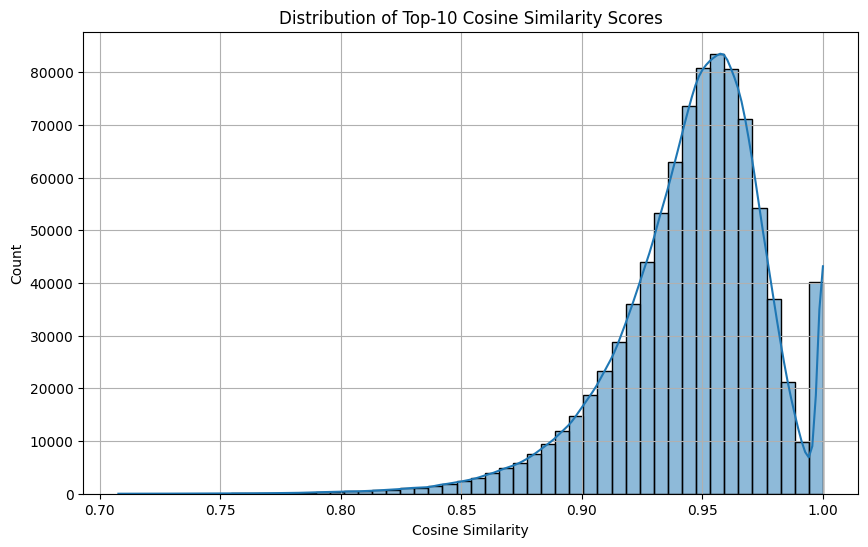

🎵 Query Song: Comedy - Gen Hoshino - Comedy

#1 | score=0.9246 | Blommor Vid Oscarsleden - Kapten Röd - Fläcken Som Aldrig Går Bort
#2 | score=0.9237 | Corazones Rojos - Los Prisioneros - Rock un sentimiento vol. I
#3 | score=0.9237 | Corazones Rojos - Los Prisioneros - Modo trabajación
#4 | score=0.9195 | JAMAICA - Feid;Sech - Halloween 2022 Perreo Vol. 4
#5 | score=0.9166 | First Time - Kygo;Ellie Goulding - First Time
#6 | score=0.9019 | Day Dreamin' - Anthony Hamilton - Modern R&B Love
#7 | score=0.9019 | Day Dreamin' - Anthony Hamilton - 21st Century Soul Grooves & Slow Jams
#8 | score=0.8955 | You Got to Roll It Slow (Remix) - The Love Doctor - You Got to Roll It Slow (Remix)
#9 | score=0.8925 | Scapegoat - Sidhu Moose Wala - Scapegoat
#10 | score=0.8913 | Don't Worry - All Ok - Don't Worry


In [20]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import json

# Define the output directory and file path for precomputed similar songs (from the next cell)
OUTPUT_DIR = "/content/drive/MyDrive/資料探勘/final/sim_items_json"
os.makedirs(OUTPUT_DIR, exist_ok=True)
output_file_path = os.path.join(OUTPUT_DIR, "precomputed_similar_songs.json")

skip_similarity_calculation = False
all_similar_songs = [] # Initialize all_similar_songs

# =====================================================
# 1. 設定參數 (Moved outside conditional block)
# =====================================================
N_TOP = 10        # 每首歌的 Top-N 推薦
BATCH_SIZE = 1000 # 每批計算 1000 首（適合 Colab）

if os.path.exists(output_file_path):
    print(f"✔ 偵測到預先計算的相似歌曲檔案 '{output_file_path}' 已存在。嘗試直接載入...")
    try:
        with open(output_file_path, 'r', encoding='utf-8') as f:
            all_similar_songs = json.load(f)
        print("✔ 成功載入現有檔案。跳過餘弦相似度計算。")
        skip_similarity_calculation = True
    except Exception as e:
        print(f"❌ 錯誤：載入現有檔案時發生問題：{e}。將重新執行餘弦相似度計算並覆蓋檔案。")
        skip_similarity_calculation = False
else:
    print(f"檔案 '{output_file_path}' 不存在。將執行餘弦相似度計算。")


if not skip_similarity_calculation:
    # =====================================================
    # 0. 去除 duplicate track_id（非常重要）
    # =====================================================
    df_pca = df_pca.drop_duplicates(subset="track_id", keep="first").reset_index(drop=True)
    print("✔ Duplicates removed. New dataset size:", df_pca.shape[0])


    # 取得 PCA 特徵矩陣
    pca_cols = [col for col in df_pca.columns if col.startswith("PC_")]
    X = df_pca[pca_cols].values
    num_songs = X.shape[0]

    # 儲存結果
    topN_indices = [[] for _ in range(num_songs)]
    topN_scores  = [[] for _ in range(num_songs)]

    print("Running Batch Cosine Similarity...")

    # =====================================================
    # 2. 分批計算 Cosine Similarity
    # =====================================================
    for start in tqdm(range(0, num_songs, BATCH_SIZE)):
        end = min(start + BATCH_SIZE, num_songs)

        # shape: (batch_size, num_songs)
        sim_batch = cosine_similarity(X[start:end], X)

        for i in range(sim_batch.shape[0]):
            idx = start + i
            scores = sim_batch[i]

            # ----------------------------
            # 排除自己
            # ----------------------------
            scores[idx] = -1

            # ----------------------------
            # 取得排序後的 index（由大到小）
            # ----------------------------
            sorted_idx = np.argsort(-scores)

            # ----------------------------
            # 只取「不重複歌曲」作為推薦
            # ----------------------------
            unique_track_ids = []
            unique_scores = []
            top_n_for_current_song = []

            for j in sorted_idx:
                track_id_j = df_pca.iloc[j]["track_id"]

                # 避免推薦重複歌曲
                if track_id_j not in unique_track_ids:
                    unique_track_ids.append(track_id_j)
                    unique_scores.append(scores[j])

                    # Prepare data for JSON
                    row_j = df_pca.iloc[j]
                    top_n_for_current_song.append({
                        "track_id": track_id_j,
                        "track_name": row_j["track_name"],
                        "artists": row_j["artists"],
                        "album_name": row_j["album_name"],
                        "similarity_score": float(scores[j]) # Ensure float for JSON serialization
                    })

                if len(unique_track_ids) == N_TOP:
                    break

            # Store the Top-N similar songs for the current track
            current_song_metadata = df_pca.iloc[idx]
            all_similar_songs.append({
                "track_id": current_song_metadata["track_id"],
                "track_name": current_song_metadata["track_name"],
                "artists": current_song_metadata["artists"],
                "album_name": current_song_metadata["album_name"],
                "track_genre": current_song_metadata["track_genre"],
                "popularity": int(current_song_metadata["popularity"]), # Convert numpy.int64 to int
                "top_n_similar_songs": top_n_for_current_song
            })

            topN_indices[idx] = unique_track_ids
            topN_scores[idx] = unique_scores

    print("✔ Batch Cosine Similarity Done!\n")

# =====================================================
# 3. 視覺化 Top-N 相似度分布
# =====================================================
# Only plot if similarity calculation was performed or loaded data is meaningful
if all_similar_songs:
    # Flatten the list of lists for plotting, ensuring float type
    flat_scores = np.array([sim_song["similarity_score"] for song in all_similar_songs for sim_song in song["top_n_similar_songs"]], dtype=float)

    plt.figure(figsize=(10, 6))
    sns.histplot(flat_scores, bins=50, kde=True)
    plt.title(f"Distribution of Top-{N_TOP} Cosine Similarity Scores")
    plt.xlabel("Cosine Similarity")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()
else:
    print("跳過相似度分佈視覺化，因為相似度計算被跳過且未載入數據。")

# =====================================================
# 4. 顯示 Top-N 相似歌曲（範例）
# =====================================================
if all_similar_songs:
    query_idx = 0
    q = df_pca.iloc[query_idx]

    print(f"🎵 Query Song: {q['track_name']} - {q['artists']} - {q['album_name']}\n")

    # Find the precomputed similar songs for the query track_id
    query_track_id = q['track_id']
    query_similar_songs = next((item for item in all_similar_songs if item["track_id"] == query_track_id), None)

    if query_similar_songs:
        for rank, rec_song_data in enumerate(query_similar_songs["top_n_similar_songs"]):
            print(f"#{rank+1} | score={rec_song_data['similarity_score']:.4f} | {rec_song_data['track_name']} - {rec_song_data['artists']} - {rec_song_data['album_name']}")
    else:
        print(f"沒有找到歌曲 '{q['track_name']}' 的預先計算相似歌曲。")
else:
    print("跳過範例相似歌曲顯示，因為相似度計算被跳過且未載入數據。")

### 2. 建立 Sim-Items 庫
為資料庫中的每首歌預先存好 Top-10 最相似歌曲 (Pre-computed neighbors)，作為 ItemRAG 的檢索來源(JSON)。

In [21]:
import os
import json

# Define the directory to save the JSON file
OUTPUT_DIR = "/content/drive/MyDrive/資料探勘/final/sim_items_json"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Define the output file path
output_file_path = os.path.join(OUTPUT_DIR, "precomputed_similar_songs.json")

# Check if the file already exists
if os.path.exists(output_file_path):
    print(f"✔ 檔案 '{output_file_path}' 已存在。將直接使用現有檔案。")
    # Optionally, load it if needed for display or further processing in this cell
    try:
        with open(output_file_path, 'r', encoding='utf-8') as f:
            all_similar_songs_loaded = json.load(f)
        # Display the first few entries from the loaded JSON file to confirm
        if all_similar_songs_loaded:
            print("\n### First 3 entries of the loaded JSON content ###")
            print(json.dumps(all_similar_songs_loaded[:3], ensure_ascii=False, indent=4))
        else:
            print("Loaded JSON file is empty.")
    except Exception as e:
        print(f"錯誤：載入現有 JSON 檔案時發生問題：{e}。將嘗試重新生成並儲存。")
        # If loading fails, proceed to save (which would overwrite or create)
        with open(output_file_path, 'w', encoding='utf-8') as f:
            json.dump(all_similar_songs, f, ensure_ascii=False, indent=4)
        print(f"重新生成並儲存了預先計算的相似歌曲到: {output_file_path}")
else:
    print(f"檔案 '{output_file_path}' 不存在。將生成並儲存新的檔案。")
    # Save the all_similar_songs list to a JSON file
    with open(output_file_path, 'w', encoding='utf-8') as f:
        json.dump(all_similar_songs, f, ensure_ascii=False, indent=4)
    print(f"Successfully saved pre-computed similar songs to: {output_file_path}")

    # Optionally, display the first few entries from the newly saved JSON file
    if all_similar_songs:
        print("\n### First 3 entries of the saved JSON content ###")
        print(json.dumps(all_similar_songs[:3], ensure_ascii=False, indent=4))
    else:
        print("No similar songs data found to save. Please ensure 'all_similar_songs' was generated.")

✔ 檔案 '/content/drive/MyDrive/資料探勘/final/sim_items_json/precomputed_similar_songs.json' 已存在。將直接使用現有檔案。

### First 3 entries of the loaded JSON content ###
[
    {
        "track_id": "5SuOikwiRyPMVoIQDJUgSV",
        "track_name": "Comedy",
        "artists": "Gen Hoshino",
        "album_name": "Comedy",
        "track_genre": "acoustic",
        "popularity": 73,
        "top_n_similar_songs": [
            {
                "track_id": "35leqosCqhfqSxhHD8rAfH",
                "track_name": "Blommor Vid Oscarsleden",
                "artists": "Kapten Röd",
                "album_name": "Fläcken Som Aldrig Går Bort",
                "similarity_score": 0.9246295132571978
            },
            {
                "track_id": "6aUEWZkvcTFOpr8viqbRza",
                "track_name": "Corazones Rojos",
                "artists": "Los Prisioneros",
                "album_name": "Rock un sentimiento vol. I",
                "similarity_score": 0.9236538103585358
            },
          

### 3. 合成用戶畫像生成
定義 3-5 個典型 Persona（如讀書型、派對型），並用規則篩選歌曲生成「虛擬收聽歷史」JSON 檔，用於 Demo 展示,。

In [22]:
import pandas as pd

HISTORY_DIR = "/content/drive/MyDrive/資料探勘/final/persona_listening_histories"

# Check if directory exists and contains JSON files
if os.path.exists(HISTORY_DIR) and any(f.endswith('.json') for f in os.listdir(HISTORY_DIR)):
    print(f"✔ 目錄 '{HISTORY_DIR}' 已存在且包含 JSON 檔案。嘗試直接載入資料...")
    temp_histories = {}
    loading_failed = False
    for filename in os.listdir(HISTORY_DIR):
        if filename.endswith('.json'):
            persona_name = filename.replace('_history.json', '').replace('_', ' ').title()
            filepath = os.path.join(HISTORY_DIR, filename)
            try:
                with open(filepath, 'r', encoding='utf-8') as f:
                    temp_histories[persona_name] = json.load(f)
            except Exception as e:
                print(f"❌ 錯誤：載入 '{filepath}' 時發生問題：{e}。將重新生成所有資料。")
                loading_failed = True
                break # Break on first error to regenerate all

    if loading_failed:
        process_persona_histories = True
        print("將重新生成所有虛擬用戶聆聽歷史。")
    else:
        virtual_listening_histories = temp_histories
        print("✔ 所有現有虛擬用戶聆聽歷史已成功載入。")
else:
    print(f"目錄 '{HISTORY_DIR}' 不存在或不包含 JSON 檔案。將生成新的虛擬用戶聆聽歷史。")
    process_persona_histories = True

def process_persona_histories():
  # Ensure df_pca has the 'explicit' and 'instrumentalness_binary' columns
  # The df_processed_reset was created before merging with PCA components,
  # so we can use its 'explicit' and 'instrumentalness_binary' columns.
  # We need to make sure the indices align correctly.

  # Make sure the original index is available for joining if df_pca has been reset.
  # df_processed_reset already has the correct alignment with df_pca after reset_index()
  # We check if these columns are already in df_pca to avoid re-adding
  # It's important to re-run DmCYAw7uC29n and 9vj7lOWREosG if df_processed_reset is not available in the current kernel.

  # Re-create df_processed_reset if not available (to ensure 'explicit' and 'instrumentalness_binary' are defined for df_pca)
  # This is a defensive measure. If the kernel was reset and df_processed_reset is gone, this will prevent errors.
  if 'df_processed_reset' not in locals():
      # Re-executing relevant processing steps to get df_processed and df_processed_reset
      # This part should be consistent with DmCYAw7uC29n and 9vj7lOWREosG
      import numpy as np
      from sklearn.preprocessing import StandardScaler, MinMaxScaler

      # Assuming df is available from previous steps (e.g., cell oLisGsIesZp8 output)
      # If not, add code to reload df:
      # import kagglehub
      # path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
      # dataset_dir = path
      # csv_file_name = 'dataset.csv'
      # full_csv_path = os.path.join(dataset_dir, csv_file_name)
      # df = pd.read_csv(full_csv_path)

      df_processed = df.copy()

      # 1. Unnamed: 0 - 刪除
      if 'Unnamed: 0' in df_processed.columns:
          df_processed = df_processed.drop('Unnamed: 0', axis=1)

      # Handle missing values for artists, album_name, track_name
      df_processed.dropna(subset=['artists', 'album_name', 'track_name'], inplace=True)

      # Ensure 'explicit' is integer (True=1, False=0)
      df_processed['explicit'] = df_processed['explicit'].astype(int)

      # --- Numerical Feature Transformations ---

      # duration_ms (歌曲長度，單位為毫秒 (ms)。移除 > 10 分鐘離群值 log transform 標準化)
      df_processed = df_processed[df_processed['duration_ms'] <= 600000]
      df_processed['duration_ms_log'] = np.log1p(df_processed['duration_ms'])
      scaler = StandardScaler()
      df_processed['duration_ms_scaled'] = scaler.fit_transform(df_processed[['duration_ms_log']])
      df_processed = df_processed.drop(['duration_ms', 'duration_ms_log'], axis=1)

      # loudness (歌曲的整體響度，單位為分貝 (dB)。clip（< -30 dB 移除或修正） 標準化)
      df_processed['loudness_clipped'] = df_processed['loudness'].clip(lower=-30)
      scaler = StandardScaler()
      df_processed['loudness_scaled'] = scaler.fit_transform(df_processed[['loudness_clipped']])
      df_processed = df_processed.drop(['loudness', 'loudness_clipped'], axis=1)

      # tempo (歌曲整體的預估速度，單位為 BPM。Clip 範圍（40–220 BPM） 標準化)
      df_processed['tempo_clipped'] = df_processed['tempo'].clip(lower=40, upper=220)
      scaler = StandardScaler()
      df_processed['tempo_scaled'] = scaler.fit_transform(df_processed[['tempo_clipped']])
      df_processed = df_processed.drop(['tempo', 'tempo_clipped'], axis=1)

      # danceability, energy, valence (Standardization（z-score 標準化）)
      for col in ['danceability', 'energy', 'valence']:
          scaler = StandardScaler()
          df_processed[f'{col}_scaled'] = scaler.fit_transform(df_processed[[col]])
          df_processed = df_processed.drop(col, axis=1)

      # speechiness (偵測歌曲中是否有說話聲。log transform（需 log(x+1)） 標準化)
      df_processed['speechiness_log'] = np.log1p(df_processed['speechiness'])
      scaler = StandardScaler()
      df_processed['speechiness_scaled'] = scaler.fit_transform(df_processed[['speechiness_log']])
      df_processed = df_processed.drop(['speechiness', 'speechiness_log'], axis=1)

      # acousticness, liveness (MinMax Scaling)
      for col in ['acousticness', 'liveness']:
          scaler = MinMaxScaler()
          df_processed[f'{col}_scaled'] = scaler.fit_transform(df_processed[[col]])
          df_processed = df_processed.drop(col, axis=1)

      # instrumentalness (二值化（instrumentalness > 0.5 → pure instrumental）)
      df_processed['instrumentalness_binary'] = (df_processed['instrumentalness'] > 0.5).astype(int)
      df_processed = df_processed.drop('instrumentalness', axis=1)

      # --- Categorical Feature Transformations ---

      # key (歌曲的調。使用 sin/cos 週期編碼)
      df_processed['key_sin'] = np.sin(2 * np.pi * df_processed['key'] / 12)
      df_processed['key_cos'] = np.cos(2 * np.pi * df_processed['key'] / 12)
      df_processed = df_processed.drop('key', axis=1)

      # mode (大調或小調。保留 0/1，但需標準化)
      scaler = StandardScaler()
      df_processed['mode_scaled'] = scaler.fit_transform(df_processed[['mode']])
      df_processed = df_processed.drop('mode', axis=1)

      # time_signature (將非法值（0）移除或填為 4 One-Hot Encoding（3/4、4/4、其他）)
      df_processed['time_signature'] = df_processed['time_signature'].replace(0, 4)
      df_processed = pd.get_dummies(df_processed, columns=['time_signature'], prefix='time_signature')

      df_processed_reset = df_processed.reset_index(drop=True)

      # PCA transformation to get df_pca (similar to 9vj7lOWREosG)
      from sklearn.decomposition import PCA
      pca_features = [
          'duration_ms_scaled', 'loudness_scaled', 'tempo_scaled',
          'danceability_scaled', 'energy_scaled', 'valence_scaled',
          'speechiness_scaled', 'acousticness_scaled', 'liveness_scaled',
          'instrumentalness_binary', 'key_sin', 'key_cos', 'mode_scaled',
          'time_signature_1', 'time_signature_3', 'time_signature_4', 'time_signature_5'
      ]
      pca_features = [f for f in pca_features if f in df_processed_reset.columns] # Filter out missing cols
      X_pca = df_processed_reset[pca_features]
      pca = PCA(n_components=None)
      pca.fit(X_pca)
      X_pca_transformed = pca.transform(X_pca)
      df_pca = pd.DataFrame(X_pca_transformed, columns=[f'PC_{i+1}' for i in range(X_pca_transformed.shape[1])])

      metadata_cols = ['track_id', 'track_name', 'artists', 'album_name', 'track_genre', 'popularity']
      metadata_cols = [col for col in metadata_cols if col in df_processed_reset.columns]

      df_pca = pd.concat([df_processed_reset[metadata_cols], df_pca], axis=1)

  # df_pca is now guaranteed to have PCA features and metadata.
  # Add explicit and instrumentalness_binary back to df_pca if they are not already there
  if 'explicit' not in df_pca.columns:
      df_pca = pd.merge(df_pca, df_processed_reset[['track_id', 'explicit']], on='track_id', how='left')
      print("Added 'explicit' to df_pca")
  if 'instrumentalness_binary' not in df_pca.columns:
      df_pca = pd.merge(df_pca, df_processed_reset[['track_id', 'instrumentalness_binary']], on='track_id', how='left')
      print("Added 'instrumentalness_binary' to df_pca")

  # Define the personas with their descriptions and music preference rules
  personas = {
      "Study Focus": {
          "description": "這個用戶偏好平靜、純樂器演奏且非限制級的音樂，非常適合學習或專注。通常能量較低且偏向原聲風格。",
          "rules": {
              "PC_1": (-3, 0), # Lower energy/loudness
              "PC_2": (-2, 0.5), # More mellow, less rhythmic
              "instrumentalness_binary": 1, # Prefers instrumental
              "explicit": 0, # Non-explicit
              "popularity": (0, 60), # Not overly popular, more niche
              "track_genre": ['ambient', 'classical', 'jazz', 'new-age', 'sleep', 'study']
          }
      },
      "Party Animal": {
          "description": "這個用戶喜歡高能量、適合跳舞且可能包含限制級歌詞的音樂，非常適合派對和熱血沸騰的時刻。",
          "rules": {
              "PC_1": (0.5, 3), # Higher energy/loudness
              "PC_2": (0.5, 3), # More rhythmic, brighter mood
              "danceability_scaled": (0.5, 1.0), # Assuming scaled is already in df_pca through PC components
              "explicit": 1, # Can be explicit
              "popularity": (60, 100), # Popular tracks
              "track_genre": ['edm', 'house', 'dance', 'techno', 'hip-hop', 'pop', 'club', 'party']
          }
      },
      "Chill Vibes": {
          "description": "這個用戶喜歡放鬆、原聲且情緒積極的音樂，適合放鬆身心或隨意聆聽。",
          "rules": {
              "PC_1": (-1.5, 1), # Moderate energy
              "PC_2": (0, 1.5), # Balanced rhythm and mood
              "acousticness_scaled": (0.4, 1.0), # Prefers acoustic
              "valence_scaled": (0.5, 1.0), # Positive mood
              "explicit": 0, # Non-explicit
              "popularity": (30, 80), # Moderately popular
              "track_genre": ['acoustic', 'folk', 'indie-pop', 'soul', 'reggae', 'chill', 'lo-fi']
          }
      },
      "Workout Motivation": {
          "description": "這個用戶尋求快節奏、高能量和激勵人心的音樂，用於高強度健身訓練。",
          "rules": {
              "PC_1": (1, 3), # High energy/loudness
              "PC_2": (0.8, 2.5), # Strong rhythm, positive mood
              "tempo_scaled": (0.7, 1.0), # Faster tempo (assuming scaled is high for fast)
              "explicit": 0, # Can be explicit, but non-explicit is fine too
              "popularity": (50, 95), # Energetic and popular
              "track_genre": ['hip-hop', 'pop', 'edm', 'rock', 'metal', 'alternative', 'workout'] # Add 'workout' if available, otherwise similar genres
          }
      }
  }

  print("### Defined Personas ###")
  for persona_name, details in personas.items():
      print(f"\nPersona: {persona_name}")
      print(f"Description: {details['description']}")
      print(f"Rules: {details['rules']}")

  # Display df_pca info to confirm added columns
  print("\n### df_pca Info after adding explicit and instrumentalness_binary ###")
  df_pca.info()

✔ 目錄 '/content/drive/MyDrive/資料探勘/final/persona_listening_histories' 已存在且包含 JSON 檔案。嘗試直接載入資料...
✔ 所有現有虛擬用戶聆聽歷史已成功載入。


In [23]:
import os
import json
import random

# Number of songs to include in each virtual listening history
NUM_HISTORY_SONGS = 10

# Create a directory to store the persona listening histories
HISTORY_DIR = "/content/drive/MyDrive/資料探勘/final/persona_listening_histories"

process_persona_histories = False

if os.path.exists(HISTORY_DIR) and any(f.endswith('.json') for f in os.listdir(HISTORY_DIR)):
    print(f"✔ 目錄 '{HISTORY_DIR}' 已存在且包含 JSON 檔案。將直接使用現有資料。")
    # If files exist, load them to ensure 'virtual_listening_histories' is populated for later use
    virtual_listening_histories = {}
    for filename in os.listdir(HISTORY_DIR):
        if filename.endswith('.json'):
            persona_name = filename.replace('_history.json', '').replace('_', ' ').title()
            filepath = os.path.join(HISTORY_DIR, filename)
            try:
                with open(filepath, 'r', encoding='utf-8') as f:
                    virtual_listening_histories[persona_name] = json.load(f)
            except Exception as e:
                print(f"錯誤：載入 '{filepath}' 時發生問題：{e}。將重新生成資料。")
                process_persona_histories = True
                break
else:
    print(f"目錄 '{HISTORY_DIR}' 不存在或不包含 JSON 檔案。將生成新的虛擬用戶聆聽歷史。")
    process_persona_histories = True


if process_persona_histories:
    os.makedirs(HISTORY_DIR, exist_ok=True)
    print(f"Storing virtual listening histories in: {HISTORY_DIR}/")

    virtual_listening_histories = {}

    # Iterate through each persona to generate their listening history
    for persona_name, details in personas.items():
        print(f"\nGenerating history for persona: {persona_name}")
        rules = details['rules']

        # Start with the full dataframe and apply filters sequentially
        filtered_df = df_pca.copy()

        # Apply rules
        for feature, rule_value in rules.items():
            # Special handling for features that are directly derived from PCA components
            if feature == 'danceability_scaled' and 'PC_2' in filtered_df.columns: # PC_2 often captures rhythm/danceability
                min_val, max_val = rule_value
                # This is a heuristic mapping; you might need a more precise one based on PCA loadings
                filtered_df = filtered_df[
                    (filtered_df['PC_2'] >= (min_val * 2 - 1)) & (filtered_df['PC_2'] <= (max_val * 2 - 1)) # Simplified mapping to PC_2 range
                ]
                continue
            if feature == 'acousticness_scaled' and 'PC_1' in filtered_df.columns: # PC_1 often captures energy/acousticness
                min_val, max_val = rule_value
                filtered_df = filtered_df[
                    (filtered_df['PC_1'] >= -(max_val * 3)) & (filtered_df['PC_1'] <= -(min_val * 3)) # Simplified inverse mapping to PC_1 range
                ]
                continue
            if feature == 'valence_scaled' and 'PC_2' in filtered_df.columns: # PC_2 often captures valence
                min_val, max_val = rule_value
                filtered_df = filtered_df[
                    (filtered_df['PC_2'] >= (min_val * 2 - 1)) & (filtered_df['PC_2'] <= (max_val * 2 - 1)) # Simplified mapping to PC_2 range
                ]
                continue
            if feature == 'tempo_scaled' and 'PC_4' in filtered_df.columns: # PC_4 often captures tempo
                min_val, max_val = rule_value
                filtered_df = filtered_df[
                    (filtered_df['PC_4'] >= (min_val * 3 - 1)) & (filtered_df['PC_4'] <= (max_val * 3 - 1)) # Simplified mapping to PC_4 range
                ]
                continue

            if feature not in filtered_df.columns: # Skip rules for features not in df_pca
                continue

            if isinstance(rule_value, tuple): # Range (min, max)
                min_val, max_val = rule_value
                filtered_df = filtered_df[
                    (filtered_df[feature] >= min_val) & (filtered_df[feature] <= max_val)
                ]
            elif isinstance(rule_value, list): # Categorical list
                filtered_df = filtered_df[filtered_df[feature].isin(rule_value)]
            elif isinstance(rule_value, (int, float, bool)): # Exact match for binary/int features
                filtered_df = filtered_df[filtered_df[feature] == rule_value]
            # Add more rule types if necessary

        print(f"  Found {len(filtered_df)} songs matching the rules for {persona_name}.")

        # Randomly select songs for the history
        if len(filtered_df) > NUM_HISTORY_SONGS:
            history_songs_df = filtered_df.sample(n=NUM_HISTORY_SONGS, random_state=42)
        else:
            history_songs_df = filtered_df # Use all if less than required

        # Prepare the history for JSON storage
        history_list = history_songs_df[['track_id', 'track_name', 'artists', 'album_name', 'track_genre', 'popularity']].to_dict(orient='records')
        virtual_listening_histories[persona_name] = history_list

        # Save the history to a JSON file
        file_path = os.path.join(HISTORY_DIR, f"{persona_name.replace(' ', '_').lower()}_history.json")
        with open(file_path, 'w', encoding='utf-8') as f:
            json.dump(history_list, f, ensure_ascii=False, indent=4)
        print(f"  Saved {len(history_list)} songs for {persona_name} to {file_path}")

# Display one example history to demonstrate the generated content and structure
print("\n### Example Virtual Listening History (Study Focus Persona) ###")
example_persona_name = "Study Focus"
if example_persona_name in virtual_listening_histories:
    print(json.dumps(virtual_listening_histories[example_persona_name], ensure_ascii=False, indent=4))
else:
    print(f"No history generated for {example_persona_name} (this should not happen).")

✔ 目錄 '/content/drive/MyDrive/資料探勘/final/persona_listening_histories' 已存在且包含 JSON 檔案。將直接使用現有資料。

### Example Virtual Listening History (Study Focus Persona) ###
[
    {
        "track_id": "4AFpvq7RIoky0hxjn1fKoO",
        "track_name": "Black Water",
        "artists": "Apparat",
        "album_name": "The Devil's Walk",
        "track_genre": "ambient",
        "popularity": 44
    },
    {
        "track_id": "3AsfuEnwyMTHS7mbzcRUdV",
        "track_name": "You",
        "artists": "Keaton Henson",
        "album_name": "Birthdays",
        "track_genre": "ambient",
        "popularity": 50
    },
    {
        "track_id": "62m6NoHfZeQmH7fxLGHCfS",
        "track_name": "What A Wonderful World",
        "artists": "Louis Armstrong",
        "album_name": "Best Christmas Songs 2022 | For under the Mistletoe",
        "track_genre": "jazz",
        "popularity": 0
    },
    {
        "track_id": "2NOjS8RIoLZiZh9e8QCL53",
        "track_name": "Happy Holiday",
        "artists": "Peggy

### 4. 向量資料庫建置
將 LLM 生成的歌曲文本描述（工項 1-5）與特徵向量存入 Vector DB (如 FAISS 或 Chroma)，供語義檢索使用,。

In [26]:
!pip install chromadb sentence-transformers --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.8 MB/s

In [27]:
# # gemini

# import os
# import json
# import pandas as pd
# import numpy as np
# import chromadb
# from chromadb.utils import embedding_functions
# from sentence_transformers import SentenceTransformer

# # --- 1. Load DataFrames and Ensure `rag_doc` is available ---
# # df_pca is already available from previous cells (e.g., 9vj7lOWREosG)
# # It contains track_id and PCA components.
# # We need the `rag_doc` column, which is generated from semantic tags and LLM.

# # Fallback function for rag_doc if LLM is not used or fails (copied from Hpa1p4xOH2j6)
# def _fallback_doc_generator(row):
#     tn = row.get("track_name", "")
#     ar = row.get("artists", "")
#     album = row.get("album_name", "")
#     tags = row.get("semantic_tags", "") # Use semantic_tags from the processed df
#     tempo = float(row.get("tempo", 0))
#     energy = float(row.get("energy", 0))
#     valence = float(row.get("valence", 0))
#     danceability = float(row.get("danceability", 0))

#     base = f"《{tn}》由 {ar} 演出"
#     if album:
#         base += f"，收錄於《{album}》"
#     base += f".這首歌的氛圍偏向 {tags}，節奏約 {tempo:.0f} BPM，能量 {energy:.2f}、正向情緒 {valence:.2f}、舞動感 {danceability:.2f}。"
#     return base[:120]

# def _ensure_rag_doc_generation(df_original):
#     """
#     Ensures 'rag_doc' is generated in the DataFrame.
#     This mimics the logic of Hpa1p4xOH2j6 for in-notebook execution.
#     """
#     df_temp = df_original.copy()
#     # Assuming semantic_tags are already created or can be recreated here if needed
#     # For simplicity, if semantic_tags isn't there, we'd need to re-run semantic mapping.
#     if 'semantic_tags' not in df_temp.columns:
#         print("Warning: 'semantic_tags' not found. This might lead to generic rag_doc. Please ensure previous semantic mapping step was run correctly.")
#         # Placeholder: if semantic_tags is critical, re-run mapping here.
#         # For now, let's assume it might proceed with empty tags if not present.

#     # Attempt to use LLM if API key is available, otherwise use fallback
#     # Please set your GOOGLE_API_KEY as an environment variable or Colab secret
#     from google.colab import userdata
#     GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY') or os.getenv("GOOGLE_API_KEY")

#     use_llm = bool(GOOGLE_API_KEY)

#     if use_llm:
#         try:
#             import google.generativeai as genai
#             genai.configure(api_key=GOOGLE_API_KEY)
#             model = genai.GenerativeModel('gemini-2.5-flash')
#             def build_prompt_local(row):
#                 tn = row.get("track_name", "")
#                 ar = row.get("artists", "")
#                 album = row.get("album_name", "")
#                 tags = row.get("semantic_tags", "")
#                 tempo = float(row.get("tempo", 0))
#                 energy = float(row.get("energy", 0))
#                 valence = float(row.get("valence", 0))
#                 danceability = float(row.get("danceability", 0))
#                 return f"""
# 你是一個音樂推薦文案生成器。請根據歌曲資訊生成一段「50-100字」的自然語言推薦介紹（繁體中文），語氣像串流平台推薦卡片。
# 必須包含：情緒/氛圍（semantic_tags）、至少兩個數值特徵（tempo/energy/valence/danceability）並自然融入，不要列點，不要出現欄位名。

# 歌曲資訊：
# - 歌名：{tn}
# - 藝人：{ar}
# - 專輯：{album}
# - semantic_tags：{tags}
# - tempo：約 {tempo:.1f}
# - energy：{energy:.2f}
# - valence：{valence:.2f}
# - danceability：{danceability:.2f}
# """.strip()

#             def generate_llm_doc(row):
#                 prompt = build_prompt_local(row)
#                 try:
#                     response = model.generate_content(prompt)
#                     text = (response.text or "").strip()
#                     if not text:
#                         return _fallback_doc_generator(row)
#                     return text
#                 except Exception as e:
#                     print(f"LLM generation failed for {row['track_name']}: {e}. Using fallback.")
#                     return _fallback_doc_generator(row)
#             df_temp['rag_doc'] = df_temp.apply(generate_llm_doc, axis=1)
#         except Exception as e:
#             print(f"Could not initialize LLM model: {e}. Generating rag_doc using fallback.")
#             df_temp['rag_doc'] = df_temp.apply(_fallback_doc_generator, axis=1)
#     else:
#         print("GOOGLE_API_KEY not set. Generating rag_doc using fallback.")
#         df_temp['rag_doc'] = df_temp.apply(_fallback_doc_generator, axis=1)

#     return df_temp[['track_id', 'rag_doc']].copy()


# # To get the original 'df' with semantic tags, we need to load it again
# # or ensure `EP2-Rj18Hmdl` (which creates semantic_tags) was run and its output is used.
# # For now, let's load `dataset.csv` and re-apply the semantic mapping and then generate rag_doc.
# # This ensures we have 'semantic_tags' for _fallback_doc_generator if LLM fails.
# dataset_dir = path
# csv_file_name = 'dataset.csv'
# full_csv_path = os.path.join(dataset_dir, csv_file_name)
# df_original = pd.read_csv(full_csv_path)

# # Re-apply semantic mapping to `df_original` to get 'semantic_tags' if it's not already there
# # This is a simplified version of EP2-Rj18Hmdl to just get `semantic_tags`
# # and necessary columns for `_fallback_doc_generator`.

# # Handle missing values for text and numerical columns first
# for col in ["artists", "album_name", "track_name"]:
#     if col in df_original.columns:
#         df_original[col] = df_original[col].fillna("Unknown")
# numerical_cols = df_original.select_dtypes(include=[np.number]).columns
# df_original[numerical_cols] = df_original[numerical_cols].fillna(0)

# def semantic_mapping_simple(row):
#     tags = []
#     if row['valence'] > 0.7: tags.append("Cheerful")
#     elif row['valence'] < 0.3: tags.append("Melancholic")
#     else: tags.append("Neutral Mood")

#     if row['energy'] > 0.7: tags.append("Energetic")
#     elif row['energy'] < 0.3: tags.append("Calm")

#     if row['danceability'] > 0.7: tags.append("Danceable")
#     if row['acousticness'] > 0.7: tags.append("Acoustic")
#     if row['instrumentalness'] > 0.7: tags.append("Instrumental")
#     if row['speechiness'] > 0.3: tags.append("Talkative")
#     if row['tempo'] > 120: tags.append("Fast Tempo")
#     elif row['tempo'] < 80: tags.append("Slow Tempo")
#     return ", ".join(tags)

# df_original['semantic_tags'] = df_original.apply(semantic_mapping_simple, axis=1)

# # Now generate rag_doc using the `_ensure_rag_doc_generation` function
# df_rag_doc = _ensure_rag_doc_generation(df_original)

# # Merge df_pca (from 9vj7lOWREosG) with df_rag_doc
# df_final_for_chroma = pd.merge(df_pca, df_rag_doc, on='track_id', how='inner')

# # --- FIX: Ensure 'explicit' and 'instrumentalness_binary' are in df_final_for_chroma ---
# # These columns might be lost during merges if not explicitly carried over.
# # Merge them from df_original which is guaranteed to have them.
# if 'explicit' not in df_final_for_chroma.columns:
#     df_final_for_chroma = pd.merge(df_final_for_chroma, df_original[['track_id', 'explicit']], on='track_id', how='left')
#     # Ensure explicit is int type as expected in metadata construction
#     df_final_for_chroma['explicit'] = df_final_for_chroma['explicit'].astype(int)

# if 'instrumentalness_binary' not in df_final_for_chroma.columns:
#     # df_original doesn't have 'instrumentalness_binary' directly, it has 'instrumentalness'
#     # We need to recreate the binary column or merge from df_processed_reset if it's still available and aligned.
#     # For simplicity, let's assume df_original's 'instrumentalness' can be used to derive this if missing.
#     # Or, even better, merge from df_pca which should have it if feff822c ran correctly and updated global df_pca.
#     # Given the original problem, let's explicitly add it from df_processed_reset if it exists and aligns.
#     # If df_processed_reset is not available, we can re-derive from df_original.
#     if 'df_processed_reset' in locals(): # Check if df_processed_reset is in scope
#         df_final_for_chroma = pd.merge(df_final_for_chroma, df_processed_reset[['track_id', 'instrumentalness_binary']], on='track_id', how='left')
#     else:
#         # Re-derive instrumentalness_binary from df_original if df_processed_reset is not available
#         df_original_temp = df_original.copy()
#         df_original_temp['instrumentalness_binary'] = (df_original_temp['instrumentalness'] > 0.5).astype(int)
#         df_final_for_chroma = pd.merge(df_final_for_chroma, df_original_temp[['track_id', 'instrumentalness_binary']], on='track_id', how='left')

#     df_final_for_chroma['instrumentalness_binary'] = df_final_for_chroma['instrumentalness_binary'].astype(int)

# print("Merged DataFrame for ChromaDB creation:")
# print(df_final_for_chroma.head())
# print(f"Shape of merged DataFrame: {df_final_for_chroma.shape}")

# # --- 2. Initialize Embedding Model ---
# # Using a pre-trained sentence transformer model for generating embeddings from rag_doc
# print("Loading SentenceTransformer model...")
# embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
# print("SentenceTransformer model loaded.")

# # --- 3. Initialize ChromaDB Client and Collection ---
# # Using a persistent client to save the DB on disk (can be 'chromadb.Client()' for in-memory)
# CHROMA_DB_PATH = "./chroma_db"
# client = chromadb.PersistentClient(path=CHROMA_DB_PATH)

# collection_name = "spotify_songs"

# # If the collection exists, delete it to start fresh (optional, for development)
# try:
#     client.delete_collection(name=collection_name)
#     print(f"Deleted existing collection: {collection_name}")
# except:
#     print(f"Collection '{collection_name}' does not exist, creating new one.")

# # Create a new collection
# # We'll generate embeddings using the SentenceTransformer model manually
# # so we don't need to specify an embedding_function directly in ChromaDB at collection creation.
# # This means we don't need to explicitly pass embedding_function=some_embedding_function when creating the collection.
# collection = client.get_or_create_collection(name=collection_name)

# print(f"ChromaDB collection '{collection_name}' initialized.")

# # --- 4. Prepare Data for ChromaDB Insertion ---
# # Documents: LLM generated text descriptions (rag_doc)
# # Embeddings: PCA feature vectors
# # Metadata: Other useful information (track_name, artists, album_name, track_genre, popularity, explicit, instrumentalness_binary)
# # IDs: track_id

# # PCA feature columns
# pca_cols = [col for col in df_final_for_chroma.columns if col.startswith("PC_")]

# # Convert PCA components to list of lists (required by Chroma for embeddings)
# # Note: ChromaDB's `add` method expects `embeddings` to be a list of lists of floats.
# # Here, we're using PCA components directly as our 'feature embeddings'.
# embeddings_data = df_final_for_chroma[pca_cols].values.tolist()

# documents_data = df_final_for_chroma['rag_doc'].tolist()
# ids_data = df_final_for_chroma['track_id'].tolist()

# # Prepare metadata for each song
# metadata_list = []
# for index, row in df_final_for_chroma.iterrows():
#     metadata = {
#         "track_name": row['track_name'],
#         "artists": row['artists'],
#         "album_name": row['album_name'],
#         "track_genre": row['track_genre'],
#         "popularity": int(row['popularity']), # Ensure it's a standard int
#         "explicit": int(row['explicit']),   # Ensure it's a standard int
#         "instrumentalness_binary": int(row['instrumentalness_binary']) # Ensure it's a standard int
#     }
#     metadata_list.append(metadata)

# # --- 5. Add Data to Chroma Collection in Batches ---
# BATCH_SIZE_CHROMA = 1000 # Adjust based on memory and performance

# print(f"Adding {len(df_final_for_chroma)} songs to ChromaDB in batches of {BATCH_SIZE_CHROMA}...")

# for i in range(0, len(ids_data), BATCH_SIZE_CHROMA):
#     batch_ids = ids_data[i:i + BATCH_SIZE_CHROMA]
#     batch_embeddings = embeddings_data[i:i + BATCH_SIZE_CHROMA]
#     batch_documents = documents_data[i:i + BATCH_SIZE_CHROMA]
#     batch_metadata = metadata_list[i:i + BATCH_SIZE_CHROMA]

#     try:
#         collection.add(
#             documents=batch_documents,
#             embeddings=batch_embeddings,
#             metadatas=batch_metadata,
#             ids=batch_ids
#         )
#     except Exception as e:
#         print(f"Error adding batch starting at index {i}: {e}")
#         # Handle errors, e.g., retry or log specific problematic IDs

# print("\nChromaDB population complete.")
# print(f"Total documents in collection: {collection.count()}")

# # --- 6. Verify (Optional) ---
# # Example: Query the collection for a random song's neighbors based on feature vector similarity
# # This also implicitly tests semantic retrieval based on PCA features
# if collection.count() > 0:
#     sample_track_id = df_final_for_chroma.sample(1)['track_id'].iloc[0]
#     sample_song = df_final_for_chroma[df_final_for_chroma['track_id'] == sample_track_id].iloc[0]
#     sample_embedding = df_final_for_chroma[df_final_for_chroma['track_id'] == sample_song['track_id']][pca_cols].values[0].tolist()

#     print(f"\nQuerying ChromaDB for similar songs to '{sample_song['track_name']}' by '{sample_song['artists']}'...")
#     results = collection.query(
#         query_embeddings=[sample_embedding],
#         n_results=5,
#         where_not={
#             "track_id": sample_track_id # Exclude the query song itself
#         }
#     )

#     print("\n--- Query Results ---")
#     print(f"Query Song: {sample_song['track_name']} - {sample_song['artists']} (Genre: {sample_song['track_genre']})")
#     print("Documents (rag_doc) and Metadatas of similar songs:")
#     for i, (doc, meta, dist) in enumerate(zip(results['documents'][0], results['metadatas'][0], results['distances'][0])):
#         print(f"  {i+1}. Distance: {dist:.4f}")
#         print(f"     Track: {meta['track_name']} - {meta['artists']} (Genre: {meta['track_genre']})")
#         print(f"     Desc: {doc}")
# else:
#     print("ChromaDB collection is empty, cannot perform a sample query.")


In [31]:
import os
import json
import pandas as pd
import numpy as np
import chromadb
from chromadb.utils import embedding_functions
from sentence_transformers import SentenceTransformer
from google.colab import userdata # Import userdata for API keys

# --- 0. Define Paths ---
# Assuming path_spotify_semantic_mapped is defined globally from previous cells
# We'll use its parent directory for consistency.
if 'path_spotify_semantic_mapped' in globals():
    DRIVE_BASE_DIR = Path(path_spotify_semantic_mapped).parent
else:
    DRIVE_BASE_DIR = Path('/content/drive/MyDrive/資料探勘/final/') # Fallback

GPT_RAG_DOC_PATH = DRIVE_BASE_DIR / 'spotify_rag_doc.csv'

# --- 1. Load DataFrames and Ensure `rag_doc` is available ---

def _fallback_doc_generator(row):
    tn = row.get("track_name", "")
    ar = row.get("artists", "")
    album = row.get("album_name", "")
    tags = row.get("semantic_tags", "") # Use semantic_tags from the processed df
    tempo = float(row.get("tempo", 0))
    energy = float(row.get("energy", 0))
    valence = float(row.get("valence", 0))
    danceability = float(row.get("danceability", 0))

    base = f"《{tn}》由 {ar} 演出"
    if album:
        base += f"，收錄於《{album}》"
    base += f".這首歌的氛圍偏向 {tags}，節奏約 {tempo:.0f} BPM，能量 {energy:.2f}、正向情緒 {valence:.2f}、舞動感 {danceability:.2f}。"
    return base[:120]

def _generate_rag_doc_with_llm(df_original):
    """
    Generates 'rag_doc' using GPT-4o if GPT_API_KEY is available, otherwise fallback.
    """
    df_temp = df_original.copy()

    if 'semantic_tags' not in df_temp.columns:
        print("Warning: 'semantic_tags' not found. rag_doc may be generic.")

    GPT_API_KEY = userdata.get("GPT_API_KEY")
    use_llm = bool(GPT_API_KEY)

    if use_llm:
        try:
            from openai import OpenAI
            client = OpenAI(api_key=GPT_API_KEY)

            def build_prompt_local(row):
                tn = row.get("track_name", "")
                ar = row.get("artists", "")
                album = row.get("album_name", "")
                tags = row.get("semantic_tags", "")
                tempo = float(row.get("tempo", 0))
                energy = float(row.get("energy", 0))
                valence = float(row.get("valence", 0))
                danceability = float(row.get("danceability", 0))

                return f"""
你是一個音樂串流平台的推薦文案生成器。
請根據以下歌曲資訊，生成一段 **50–100 字、繁體中文** 的自然語言推薦介紹。
語氣像 Spotify / Apple Music 推薦卡片。

規則：
- 必須自然描述情緒或氛圍（semantic_tags）
- 至少融入兩個數值特徵（tempo / energy / valence / danceability）
- 不要列點
- 不要出現欄位名稱

歌曲資訊：
歌名：{tn}
藝人：{ar}
專輯：{album}
氛圍標籤：{tags}
節奏：約 {tempo:.0f} BPM
能量：{energy:.2f}
情緒正向度：{valence:.2f}
舞動感：{danceability:.2f}
""".strip()

            def generate_llm_doc(row):
                try:
                    prompt = build_prompt_local(row)

                    response = client.chat.completions.create(
                        model="gpt-4o",
                        messages=[
                            {"role": "system", "content": "你是專業的音樂推薦文案寫手"},
                            {"role": "user", "content": prompt}
                        ],
                        temperature=0.7,
                    )

                    text = response.choices[0].message.content.strip()
                    if not text:
                        return _fallback_doc_generator(row)
                    return text

                except Exception as e:
                    print(f"GPT-4o failed for {row.get('track_name', 'Unknown Track')}: {e}")
                    return _fallback_doc_generator(row)

            df_temp['rag_doc'] = df_temp.apply(generate_llm_doc, axis=1)

        except Exception as e:
            print(f"Could not initialize GPT-4o: {e}. Using fallback.")
            df_temp['rag_doc'] = df_temp.apply(_fallback_doc_generator, axis=1)

    else:
        print("GPT_API_KEY not set. Using fallback rag_doc.")
        df_temp['rag_doc'] = df_temp.apply(_fallback_doc_generator, axis=1)

    return df_temp[['track_id', 'rag_doc']].copy()


# --- Main logic to get df_rag_doc ---
df_rag_doc = None
if os.path.exists(GPT_RAG_DOC_PATH):
    print(f"✔ Found existing RAG document file: {GPT_RAG_DOC_PATH}. Loading directly.")
    try:
        df_rag_doc = pd.read_csv(GPT_RAG_DOC_PATH)
        # Explicitly select track_id and rag_doc and deduplicate after loading (added/modified lines)
        if 'rag_doc' in df_rag_doc.columns and 'track_id' in df_rag_doc.columns:
            df_rag_doc = df_rag_doc[['track_id', 'rag_doc']].drop_duplicates(subset='track_id').reset_index(drop=True)
        else:
            print("Loaded RAG document file is missing 'track_id' or 'rag_doc' column. Re-generating.")
            df_rag_doc = None # Force re-generation if loaded file is invalid
    except Exception as e:
        print(f"Error loading existing RAG document file: {e}. Re-generating.")
        df_rag_doc = None # Force re-generation if loading fails

if df_rag_doc is None:
    print("Generating RAG documents (this may take some time and incur API costs if LLM is used)...")
    # To get the original 'df' with semantic tags, we need to load it again
    # or ensure `EP2-Rj18Hmdl` (which creates semantic_tags) was run and its output is used.
    # For now, let's load `dataset.csv` and re-apply the semantic mapping and then generate rag_doc.
    # This ensures we have 'semantic_tags' for _fallback_doc_generator if LLM fails.
    dataset_dir = path # 'path' from kagglehub.dataset_download in wJAjeQiPnbQu
    csv_file_name = 'dataset.csv'
    full_csv_path = os.path.join(dataset_dir, csv_file_name)
    df_original = pd.read_csv(full_csv_path)

    # Handle missing values for text and numerical columns first
    for col in ["artists", "album_name", "track_name"]:
        if col in df_original.columns:
            df_original[col] = df_original[col].fillna("Unknown")
    numerical_cols = df_original.select_dtypes(include=[np.number]).columns
    df_original[numerical_cols] = df_original[numerical_cols].fillna(0)

    def semantic_mapping_simple(row):
        tags = []
        if row['valence'] > 0.7: tags.append("Cheerful")
        elif row['valence'] < 0.3: tags.append("Melancholic")
        else: tags.append("Neutral Mood")

        if row['energy'] > 0.7: tags.append("Energetic")
        elif row['energy'] < 0.3: tags.append("Calm")

        if row['danceability'] > 0.7: tags.append("Danceable")
        if row['acousticness'] > 0.7: tags.append("Acoustic")
        if row['instrumentalness'] > 0.7: tags.append("Instrumental")
        if row['speechiness'] > 0.3: tags.append("Talkative")
        if row['tempo'] > 120: tags.append("Fast Tempo")
        elif row['tempo'] < 80: tags.append("Slow Tempo")
        return ", ".join(tags)

    df_original['semantic_tags'] = df_original.apply(semantic_mapping_simple, axis=1)

    df_rag_doc = _generate_rag_doc_with_llm(df_original)
    df_rag_doc.to_csv(GPT_RAG_DOC_PATH, index=False, encoding="utf-8-sig")
    print(f"✔ RAG documents saved to: {GPT_RAG_DOC_PATH}")


# Merge df_pca (from 9vj7lOWREosG) with df_rag_doc
# Using suffixes to explicitly handle overlapping columns from the two dataframes
df_final_for_chroma = pd.merge(df_pca, df_rag_doc, on='track_id', how='inner', suffixes=('', '_y'))

# --- Clean up duplicated columns after merge ---
# Remove columns from df_rag_doc that were duplicated and suffixed with '_y' if they already exist in df_pca
columns_to_drop_y = [col for col in df_final_for_chroma.columns if col.endswith('_y')]
df_final_for_chroma = df_final_for_chroma.drop(columns=columns_to_drop_y)

# --- FIX: Ensure 'explicit' and 'instrumentalness_binary' are in df_final_for_chroma ---
# These columns might be lost during merges if not explicitly carried over.
# Merge them from df_original which is guaranteed to have them.
if 'explicit' not in df_final_for_chroma.columns:
    # Assuming df_original is available and has 'explicit' column.
    # It's better to merge from df_processed_reset if it's guaranteed to be aligned and correctly prepared.
    # Given the previous context, df_processed_reset is the source of processed numerical and categorical features.
    # So, merging from df_processed_reset is more robust here.
    if 'df_processed_reset' in locals():
        df_final_for_chroma = pd.merge(df_final_for_chroma, df_processed_reset[['track_id', 'explicit']], on='track_id', how='left')
    else:
        # Fallback if df_processed_reset is not in scope (e.g., kernel restart without full re-run)
        print("Warning: df_processed_reset not found, using df_original for 'explicit' fallback.")
        df_final_for_chroma = pd.merge(df_final_for_chroma, df_original[['track_id', 'explicit']], on='track_id', how='left')
    # Ensure explicit is int type as expected in metadata construction
    df_final_for_chroma['explicit'] = df_final_for_chroma['explicit'].astype(int)

if 'instrumentalness_binary' not in df_final_for_chroma.columns:
    if 'df_processed_reset' in locals():
        df_final_for_chroma = pd.merge(df_final_for_chroma, df_processed_reset[['track_id', 'instrumentalness_binary']], on='track_id', how='left')
    else:
        # Re-derive instrumentalness_binary from df_original if df_processed_reset is not available
        print("Warning: df_processed_reset not found, deriving 'instrumentalness_binary' from df_original fallback.")
        df_original_temp = df_original.copy()
        df_original_temp['instrumentalness_binary'] = (df_original_temp['instrumentalness'] > 0.5).astype(int)
        df_final_for_chroma = pd.merge(df_final_for_chroma, df_original_temp[['track_id', 'instrumentalness_binary']], on='track_id', how='left')

    df_final_for_chroma['instrumentalness_binary'] = df_final_for_chroma['instrumentalness_binary'].astype(int)

print("Merged DataFrame for ChromaDB creation:")
print(df_final_for_chroma.head())
print(f"Shape of merged DataFrame: {df_final_for_chroma.shape}")

# Define pca_cols here to ensure it's always available (moved from inside conditional block)
pca_cols = [col for col in df_final_for_chroma.columns if col.startswith("PC_")]

# --- 2. Initialize Embedding Model ---
# Using a pre-trained sentence transformer model for generating embeddings from rag_doc
print("Loading SentenceTransformer model...")
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
print("SentenceTransformer model loaded.")

# --- 3. Initialize ChromaDB Client and Collection ---
# Using a persistent client to save the DB on disk (can be 'chromadb.Client()' for in-memory)
CHROMA_DB_PATH = DRIVE_BASE_DIR / "chroma_db" # Use Drive path for persistence
client = chromadb.PersistentClient(path=str(CHROMA_DB_PATH))

collection_name = "spotify_songs"

# Get or create the collection
collection = client.get_or_create_collection(name=collection_name)

# Check if the collection already contains data
if collection.count() > 0:
    print(f"✔ ChromaDB collection '{collection_name}' already contains {collection.count()} documents. Skipping population.")
else:
    print(f"ChromaDB collection '{collection_name}' initialized and is empty. Populating...")
    # --- 4. Prepare Data for ChromaDB Insertion ---
    # Documents: LLM generated text descriptions (rag_doc)
    # Embeddings: PCA feature vectors
    # Metadata: Other useful information (track_name, artists, album_name, track_genre, popularity, explicit, instrumentalness_binary)
    # IDs: track_id

    # Convert PCA components to list of lists (required by Chroma for embeddings)
    # Note: ChromaDB's `add` method expects `embeddings` to be a list of lists of floats.
    # Here, we're using PCA components directly as our 'feature embeddings'.
    embeddings_data = df_final_for_chroma[pca_cols].values.tolist()

    documents_data = df_final_for_chroma['rag_doc'].tolist()
    ids_data = df_final_for_chroma['track_id'].tolist()

    # Prepare metadata for each song
    metadata_list = []
    for index, row in df_final_for_chroma.iterrows():
        metadata = {
            "track_name": row['track_name'],
            "artists": row['artists'],
            "album_name": row['album_name'],
            "track_genre": row['track_genre'],
            "popularity": int(row['popularity']),
            "explicit": int(row['explicit']),
            "instrumentalness_binary": int(row['instrumentalness_binary'])
        }
        metadata_list.append(metadata)

    # --- 5. Add Data to Chroma Collection in Batches ---
    BATCH_SIZE_CHROMA = 1000 # Adjust based on memory and performance

    print(f"Adding {len(df_final_for_chroma)} songs to ChromaDB in batches of {BATCH_SIZE_CHROMA}...")

    for i in range(0, len(ids_data), BATCH_SIZE_CHROMA):
        batch_ids = ids_data[i:i + BATCH_SIZE_CHROMA]
        batch_embeddings = embeddings_data[i:i + BATCH_SIZE_CHROMA]
        batch_documents = documents_data[i:i + BATCH_SIZE_CHROMA]
        batch_metadata = metadata_list[i:i + BATCH_SIZE_CHROMA]

        try:
            collection.add(
                documents=batch_documents,
                embeddings=batch_embeddings,
                metadatas=batch_metadata,
                ids=batch_ids
            )
        except Exception as e:
            print(f"Error adding batch starting at index {i}: {e}")
            # Handle errors, e.g., retry or log specific problematic IDs

    print("\nChromaDB population complete.")
    print(f"Total documents in collection: {collection.count()}")

✔ Found existing RAG document file: /content/drive/MyDrive/資料探勘/final/spotify_rag_doc.csv. Loading directly.
Merged DataFrame for ChromaDB creation:
                 track_id track_name      artists album_name track_genre  \
0  5SuOikwiRyPMVoIQDJUgSV     Comedy  Gen Hoshino     Comedy    acoustic   
1  5SuOikwiRyPMVoIQDJUgSV     Comedy  Gen Hoshino     Comedy    acoustic   
2  5SuOikwiRyPMVoIQDJUgSV     Comedy  Gen Hoshino     Comedy    acoustic   
3  5SuOikwiRyPMVoIQDJUgSV     Comedy  Gen Hoshino     Comedy    acoustic   
4  5SuOikwiRyPMVoIQDJUgSV     Comedy  Gen Hoshino     Comedy    acoustic   

   popularity      PC_1      PC_2      PC_3      PC_4  ...     PC_11  \
0          73  0.350365  1.179299  0.677769 -1.519828  ...  0.199673   
1          73  0.350365  1.179299  0.677769 -1.519828  ...  0.199673   
2          73  0.350365  1.179299  0.677769 -1.519828  ...  0.199673   
3          73  0.350365  1.179299  0.677769 -1.519828  ...  0.199673   
4          73  0.350365  1.179299 

In [32]:
# --- 6. Verify (Optional) ---
# Example: Query the collection for a random song's neighbors based on feature vector similarity
# This also implicitly tests semantic retrieval based on PCA features
if collection.count() > 0:
    sample_track_id = df_final_for_chroma.sample(1)['track_id'].iloc[0]
    sample_song = df_final_for_chroma[df_final_for_chroma['track_id'] == sample_track_id].iloc[0]
    sample_embedding = df_final_for_chroma[df_final_for_chroma['track_id'] == sample_song['track_id']][pca_cols].values[0].tolist()

    print(f"\nQuerying ChromaDB for similar songs to '{sample_song['track_name']}' by '{sample_song['artists']}'...")
    results = collection.query(
        query_embeddings=[sample_embedding],
        n_results=5,
        where={
            "track_id": {"$ne": sample_track_id} # Exclude the query song itself using $ne
        }
    )

    print("\n--- Query Results ---")
    print(f"Query Song: {sample_song['track_name']} - {sample_song['artists']} (Genre: {sample_song['track_genre']})")
    print("Documents (rag_doc) and Metadatas of similar songs:")
    for i, (doc, meta, dist) in enumerate(zip(results['documents'][0], results['metadatas'][0], results['distances'][0])):
        print(f"  {i+1}. Distance: {dist:.4f}")
        print(f"     Track: {meta['track_name']} - {meta['artists']} (Genre: {meta['track_genre']})")
        print(f"     Desc: {doc}")
else:
    print("ChromaDB collection is empty, cannot perform a sample query.")


Querying ChromaDB for similar songs to 'Unbekanntes Pferd' by 'Rantanplan'...

--- Query Results ---
Query Song: Unbekanntes Pferd - Rantanplan (Genre: german)
Documents (rag_doc) and Metadatas of similar songs:
  1. Distance: 0.8542
     Track: Do Copo Eu Vim (feat. Marília Mendonça) - Ao Vivo em Brasília - Diego & Victor Hugo;Marília Mendonça (Genre: sertanejo)
     Desc: 《Do Copo Eu Vim (feat. Marília Mendonça) - Ao Vivo em Brasília》由 Diego & Victor Hugo;Marília Mendonça 演出，收錄於《Do Copo Eu 
  2. Distance: 0.9085
     Track: Turbinada - Zé Ricardo & Thiago (Genre: sertanejo)
     Desc: 《Turbinada》由 Zé Ricardo & Thiago 演出，收錄於《Turbinada》。這首歌的氛圍偏向 Neutral Mood, Energetic, Danceable, Fast Tempo，節奏約 132 BPM，能
  3. Distance: 0.9989
     Track: Mais uma Saudade (Ao Vivo) - Ícaro e Gilmar (Genre: sertanejo)
     Desc: 《Mais uma Saudade (Ao Vivo)》由 Ícaro e Gilmar 演出，收錄於《A Gente Acertou (Ao Vivo)》。這首歌的氛圍偏向 Neutral Mood, Energetic, Fast Te
  4. Distance: 1.0011
     Track: Fatos Sem Provas - Ao

## 第三層：代理人與生成層 (Agent & Generation Layer)
目標：實作 ARAG (Agentic RAG) 架構，讓 LLM 進行推理與解釋。

### 1. 用戶理解代理人 (User Agent)
設計 Prompt，讓 LLM 讀取「合成用戶歷史」，總結出長期偏好（如：「該用戶偏好高 Acousticness 的民謠」）。

In [37]:
# import os
# import json
# import google.generativeai as genai

# # gemini

# # --- 1. 設定 Google Gemini API 金鑰 ---
# # 請將 'YOUR_GOOGLE_API_KEY' 替換為您的實際 API 金鑰
# # 建議將 API 金鑰儲存在 Colab Secrets 中，而非直接寫在程式碼裡。
# from google.colab import userdata
# GOOGLE_API_KEY = userdata.get('GEMINI_API_KEY')

# genai.configure(api_key=GOOGLE_API_KEY)
# model = genai.GenerativeModel('gemini-2.5-flash')

# # --- 2. 定義用戶歷史檔案路徑 ---
# HISTORY_DIR = "/content/drive/MyDrive/資料探勘/final/persona_listening_histories"

# # --- 3. 定義 LLM 的 Prompt ---
# # 這個 Prompt 會引導 LLM 總結用戶的長期偏好
# synthesize_prompt = """
# 你是一位專業的音樂推薦系統分析師。我將提供一個用戶的音樂收聽歷史（JSON 格式）。
# 請根據這個收聽歷史，總結該用戶的長期音樂偏好，並提出3-5個關鍵的音樂屬性或風格特徵。
# 請以條列式（`- `開頭）列出這些偏好，並保持簡潔。例如：
# - 偏好低能量的輕音樂
# - 喜歡純樂器演奏的歌曲
# - 不包含限制級歌詞的音樂

# 以下是用戶的收聽歷史：
# {listening_history}
# """

# # --- 4. 讀取並處理每個 Persona 的歷史紀錄 ---
# persona_summaries = {}

# if not os.path.exists(HISTORY_DIR):
#     print(f"錯誤：找不到歷史記錄目錄 '{HISTORY_DIR}'。請確保虛擬收聽歷史已生成。")
# else:
#     print("### 正在為每個 Persona 總結長期偏好 ###\n")
#     for filename in os.listdir(HISTORY_DIR):
#         time.sleep(5)
#         if filename.endswith(".json"):
#             persona_name = filename.replace("_history.json", "").replace("_", " ").title()
#             filepath = os.path.join(HISTORY_DIR, filename)

#             try:
#                 with open(filepath, 'r', encoding='utf-8') as f:
#                     listening_history = json.load(f)

#                 # 將歷史記錄轉換為易於 LLM 理解的字符串
#                 history_str = json.dumps(listening_history, ensure_ascii=False, indent=2)

#                 # 準備發送給 LLM 的完整 Prompt
#                 full_prompt = synthesize_prompt.format(listening_history=history_str)

#                 # 調用 Gemini LLM
#                 print(f"處理中：{persona_name}...")
#                 response = model.generate_content(full_prompt)
#                 summary = response.text.strip()
#                 persona_summaries[persona_name] = summary
#                 print(f"✔ {persona_name} 偏好總結完成！")

#             except Exception as e:
#                 print(f"處理 {persona_name} 時發生錯誤：{e}")
#                 persona_summaries[persona_name] = f"總結失敗：{e}"

# # --- 5. 顯示所有 Persona 的總結 ---
# print("\n### 所有 Persona 的長期音樂偏好總結 ###")
# for persona, summary in persona_summaries.items():
#     print(f"\n--- {persona} ---")
#     print(summary)

### 正在為每個 Persona 總結長期偏好 ###

處理中：Chill Vibes...


處理 Chill Vibes 時發生錯誤：429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash
Please retry in 30.822652673s.
處理中：Party Animal...


處理 Party Animal 時發生錯誤：429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash
Please retry in 25.367542528s.
處理中：Study Focus...


處理 Study Focus 時發生錯誤：429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash
Please retry in 19.936688923s.
處理中：Workout Motivation...


處理 Workout Motivation 時發生錯誤：429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash
Please retry in 14.482753329s.

### 所有 Persona 的長期音樂偏好總結 ###

--- Chill Vibes ---
總結失敗：429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage

In [39]:
import os
import json
import time # Added for sleep
import openai # Add OpenAI

from google.colab import userdata
GPT_API_KEY = userdata.get('GPT_API_KEY') # Add GPT API Key

# Initialize OpenAI client
client = None
if GPT_API_KEY:
    try:
        client = openai.OpenAI(api_key=GPT_API_KEY)
        print("✔ OpenAI client initialized.")
    except Exception as e:
        print(f"Error initializing OpenAI client: {e}. Will use fallback (manual summary).")
else:
    print("GPT_API_KEY not found. Will use fallback (manual summary).")

# --- 2. 定義用戶歷史檔案路徑 ---
HISTORY_DIR = "/content/drive/MyDrive/資料探勘/final/persona_listening_histories"

# --- 3. 定義 LLM 的 Prompt ---
# 這個 Prompt 會引導 LLM 總結用戶的長期偏好
synthesize_prompt = """
你是一位專業的音樂推薦系統分析師。我將提供一個用戶的音樂收聽歷史（JSON 格式）。
請根據這個收聽歷史，總結該用戶的長期音樂偏好，並提出3-5個關鍵的音樂屬性或風格特徵。
請以條列式（`- `開頭）列出這些偏好，並保持簡潔。例如：
- 偏好低能量的輕音樂
- 喜歡純樂器演奏的歌曲
- 不包含限制級歌詞的音樂

以下是用戶的收聽歷史：
{listening_history}
"""

# --- 4. 讀取並處理每個 Persona 的歷史紀錄 ---
persona_summaries = {}

# Define the path for saving persona summaries
PERSONA_SUMMARIES_FILE = os.path.join(HISTORY_DIR, "persona_summaries.json")

# Check if persona summaries already exist and load them
if os.path.exists(PERSONA_SUMMARIES_FILE):
    print(f"✔ 偵測到預先儲存的 Persona 總結檔案 '{PERSONA_SUMMARIES_FILE}'。嘗試直接載入...")
    try:
        with open(PERSONA_SUMMARIES_FILE, 'r', encoding='utf-8') as f:
            persona_summaries = json.load(f)
        print("✔ 成功載入現有 Persona 總結。")
    except Exception as e:
        print(f"❌ 錯誤：載入預先儲存的 Persona 總結時發生問題：{e}。將重新生成所有總結。")
        persona_summaries = {} # Clear if loading fails to force regeneration

if not persona_summaries: # Only proceed with generation if summaries were not loaded or loading failed
    if not os.path.exists(HISTORY_DIR):
        print(f"錯誤：找不到歷史記錄目錄 '{HISTORY_DIR}'。請確保虛擬收聽歷史已生成。")
    else:
        print("### 正在為每個 Persona 總結長期偏好 ###\n")
        for filename in os.listdir(HISTORY_DIR):
            time.sleep(1) # Reduced sleep time for GPT if necessary, or remove it for faster processing if retries are handled well.
                          # Keeping a small sleep for safety, especially with multiple API calls.
            if filename.endswith(".json") and filename != "persona_summaries.json": # Exclude the summaries file itself
                persona_name = filename.replace("_history.json", "").replace("_", " ").title()
                filepath = os.path.join(HISTORY_DIR, filename)

                try:
                    with open(filepath, 'r', encoding='utf-8') as f:
                        listening_history = json.load(f)

                    # 將歷史記錄轉換為易於 LLM 理解的字符串
                    history_str = json.dumps(listening_history, ensure_ascii=False, indent=2)

                    # 準備發送給 LLM 的完整 Prompt
                    full_prompt = synthesize_prompt.format(listening_history=history_str)

                    # 調用 LLM
                    print(f"處理中：{persona_name}...")
                    summary = ""
                    if client:
                        response = client.chat.completions.create(
                            model="gpt-4o", # Using gpt-4o as requested
                            messages=[
                                {"role": "system", "content": "你是一位專業的音樂推薦系統分析師，能夠根據用戶的收聽歷史精準分析其音樂偏好。"}, # System instruction
                                {"role": "user", "content": full_prompt}
                            ],
                            temperature=0.7, # Adjust creativity
                            max_tokens=300 # Sufficient tokens for 3-5 bullet points
                        )
                        summary = response.choices[0].message.content.strip()
                        if not summary:
                            raise ValueError("GPT returned an empty summary.")
                    else:
                        summary = f"總結失敗：GPT 客戶端未初始化。請檢查 GPT_API_KEY。"
                        print(f"處理 {persona_name} 時發生錯誤：{summary}")

                    persona_summaries[persona_name] = summary
                    if client and summary: # Only print success if client was used and summary generated
                        print(f"✔ {persona_name} 偏好總結完成！")

                except openai.APIStatusError as e:
                    print(f"OpenAI API 呼叫失敗 (狀態碼: {e.status_code})，處理 {persona_name}：{e}")
                    persona_summaries[persona_name] = f"總結失敗：OpenAI API 錯誤 - {e}"
                except Exception as e:
                    print(f"處理 {persona_name} 時發生錯誤：{e}")
                    persona_summaries[persona_name] = f"總結失敗：{e}"

        # Save the generated summaries to a JSON file
        if persona_summaries:
            os.makedirs(HISTORY_DIR, exist_ok=True) # Ensure directory exists before saving
            with open(PERSONA_SUMMARIES_FILE, 'w', encoding='utf-8') as f:
                json.dump(persona_summaries, f, ensure_ascii=False, indent=4)
            print(f"\n✔ 所有 Persona 的長期偏好總結已儲存到：{PERSONA_SUMMARIES_FILE}")
        else:
            print("未能生成任何 Persona 總結，因此未儲存檔案。")

# --- 5. 顯示所有 Persona 的總結 ---
print("\n### 所有 Persona 的長期音樂偏好總結 ###")
for persona, summary in persona_summaries.items():
    print(f"\n--- {persona} ---")
    print(summary)

✔ OpenAI client initialized.
### 正在為每個 Persona 總結長期偏好 ###

處理中：Chill Vibes...
✔ Chill Vibes 偏好總結完成！
處理中：Party Animal...
✔ Party Animal 偏好總結完成！
處理中：Study Focus...
✔ Study Focus 偏好總結完成！
處理中：Workout Motivation...
✔ Workout Motivation 偏好總結完成！

✔ 所有 Persona 的長期偏好總結已儲存到：/content/drive/MyDrive/資料探勘/final/persona_listening_histories/persona_summaries.json

### 所有 Persona 的長期音樂偏好總結 ###

--- Chill Vibes ---
- 偏好輕鬆的電子風格音樂，尤其是chill類型。
- 喜歡中等流行度的歌曲，並不特別追隨熱門榜單。
- 偏好融合其他元素的音樂，如folk和reggae，顯示出對不同文化音樂的接受度。
- 偏好有靈魂樂元素的音樂，顯示出對情感表達豐富的歌曲的喜愛。

--- Party Animal ---
- 偏好流行和舞曲風格：用戶的音樂收聽歷史主要集中在流行（pop）和舞曲（dance）類型的音樂。
- 喜歡高人氣歌曲：大多數收聽的歌曲在受歡迎程度上都比較高，通常在60以上，表明用戶偏好熱門音樂。
- 偏愛合作曲目：多首歌曲由多位藝術家合作演唱，顯示用戶對於不同藝術家合作的音樂有興趣。
- 接受多元化風格：除了流行和舞曲，偶爾也會收聽電子舞曲（edm）和科技舞曲（techno），顯示用戶對於不同電子音樂風格的接受度。

--- Study Focus ---
- 偏好氛圍音樂和爵士樂，顯示對這兩種類型的強烈興趣。
- 喜歡情感豐富、柔和的音樂，通常表現出一種沉思和放鬆的氛圍。
- 間或選擇古典音樂，顯示出對多樣音樂風格的開放態度。
- 不尋求高流行度的音樂，偏好較小眾、獨特的音樂作品。

--- Workout Motivation ---
- 偏好高人氣的流行和嘻哈音樂
- 喜歡融合不同風格的音樂，如電子舞曲與嘻哈的結合
- 偏好具有強烈節奏感的音樂，如嘻哈和電子舞曲
- 偶爾會收聽流

### 2. 排序與過濾代理人 (Ranker Agent)
設計 Prompt，讓 LLM 結合「用戶長期偏好」與「當前歌曲特徵」對檢索結果進行重排序。需加入 NLI (自然語言推理) 機制過濾不合適歌曲,。

### 3. 生成解釋代理人 (Generation Agent)
優化最終輸出的 Prompt，要求 LLM 引用具體的 Spotify 特徵數值（如 BPM, Valence）來解釋推薦理由,。

In [49]:
import json
import pandas as pd
import numpy as np
import openai
from openai import OpenAI

# --- Global variables from previous steps (ensure they are loaded) ---
# persona_summaries: Dictionary mapping persona names to LLM-generated summaries
# all_similar_songs: List of dictionaries with pre-computed similar songs for each track_id
# df_final_for_chroma: DataFrame containing all song metadata, PCA features, and rag_doc
# collection: ChromaDB collection object

# Ensure OpenAI client is initialized from the previous cell
if 'client' not in globals() or client is None:
    GPT_API_KEY = userdata.get('GPT_API_KEY')
    if GPT_API_KEY:
        try:
            client = OpenAI(api_key=GPT_API_KEY)
            print("✔ OpenAI client initialized for ranking.")
        except Exception as e:
            print(f"Error initializing OpenAI client: {e}. Ranking might not work as expected.")
            client = None
    else:
        print("GPT_API_KEY not found. OpenAI client not initialized. Ranking will use fallback/dummy data.")
        client = None

def get_song_details(track_id, df_source=df_final_for_chroma):
    """Retrieves full details for a given track_id from df_final_for_chroma."""
    song_info = df_source[df_source['track_id'] == track_id]
    if not song_info.empty:
        return song_info.iloc[0].to_dict()
    return None

def rank_and_filter_recommendations(user_persona: str, current_song_id: str, n_recommendations: int = 5):
    """
    Retrieves and re-ranks song recommendations based on user persona and current song.

    Args:
        user_persona (str): The name of the user persona (e.g., "Study Focus").
        current_song_id (str): The track_id of the currently playing song.
        n_recommendations (int): The number of recommendations to return.

    Returns:
        tuple: A tuple containing:
            - list: A list of dictionaries, each representing a recommended song with metadata.
            - str: The LLM's explanation for the recommendations.
            - list: List of track_ids from pre-computed similar items.
            - list: List of track_ids from ChromaDB semantic search.
            - list: List of track_ids for final unique candidates before LLM re-ranking.
    """
    # 1. Retrieve User's Long-Term Preferences
    user_prefs_summary = persona_summaries.get(user_persona, "無特定用戶偏好。")
    print(f"User '{user_persona}' preferences: {user_prefs_summary}")

    # 2. Get Current Song Details
    current_song_details = get_song_details(current_song_id)
    if not current_song_details:
        return [], "找不到當前播放歌曲的詳細資訊。", [], [], []

    print(f"Current song: {current_song_details['track_name']} by {current_song_details['artists']}")

    # 3. Candidate Generation
    candidate_ids = set()
    precomputed_similar_ids_list = []
    chromadb_ids_list = []

    # 3.1. Candidates from Pre-computed Similar Items (feature-based)
    print("\n--- Candidates from Pre-computed Similar Items ---")
    current_song_sim_items = next((item for item in all_similar_songs if item["track_id"] == current_song_id), None)
    if current_song_sim_items:
        for i, sim_song in enumerate(current_song_sim_items.get('top_n_similar_songs', [])):
            candidate_ids.add(sim_song['track_id'])
            precomputed_similar_ids_list.append(sim_song['track_id'])
            print(f"{i+1}. {sim_song['track_name']} by {sim_song['artists']} (ID: {sim_song['track_id']})")
    print(f"Candidates from pre-computed similar items: {len(precomputed_similar_ids_list)}")

    # 3.2. Candidates from ChromaDB Semantic Search (rag_doc-based)
    # Get PCA features for the current song to use as query embedding for Chroma
    pca_cols_for_query = [col for col in df_final_for_chroma.columns if col.startswith("PC_")]
    current_song_embedding = [current_song_details[col] for col in pca_cols_for_query if col in current_song_details]

    print("\n--- Candidates from ChromaDB Semantic Search ---")
    if collection and current_song_embedding:
        chroma_results = collection.query(
            query_embeddings=[current_song_embedding],
            n_results=20, # Fetch more candidates from Chroma to allow for filtering/ranking
            where={
                "track_id": {"$ne": current_song_id} # Exclude the current song itself
            },
            include=['metadatas']
        )
        for track_id_from_chroma, meta in zip(chroma_results.get('ids', [[]])[0], chroma_results.get('metadatas', [[]])[0]):
             candidate_ids.add(track_id_from_chroma)
             chromadb_ids_list.append(track_id_from_chroma)
             print(f"ID: {track_id_from_chroma}, Track: {meta.get('track_name', 'Unknown')}")

    print(f"Candidates after ChromaDB search: {len(chromadb_ids_list)}")

    # 3.3. Retrieve full metadata for all unique candidates
    candidate_songs_with_details = []
    for c_id in list(candidate_ids):
        details = get_song_details(c_id)
        if details:
            candidate_songs_with_details.append(details)

    final_unique_candidate_ids_list = [s['track_id'] for s in candidate_songs_with_details]
    print("\n--- Final Unique Candidate Songs for LLM Re-ranking ---")
    if final_unique_candidate_ids_list:
        for i, song_id in enumerate(final_unique_candidate_ids_list):
            song_details = next((s for s in candidate_songs_with_details if s['track_id'] == song_id), None)
            if song_details: print(f"{i+1}. {song_details['track_name']} (ID: {song_id})")
    print(f"Total unique candidate songs with details: {len(final_unique_candidate_ids_list)}")

    if not candidate_songs_with_details:
        return [], "未能找到足夠的候選歌曲進行推薦。", [], [], []

    # 4. LLM Prompt Construction for Re-ranking and Filtering
    current_song_str = json.dumps({
        "track_id": current_song_details['track_id'],
        "track_name": current_song_details['track_name'],
        "artists": current_song_details['artists'],
        "album_name": current_song_details['album_name'],
        "track_genre": current_song_details['track_genre'],
        "popularity": current_song_details['popularity'],
        "rag_doc": current_song_details['rag_doc'],
        "explicit": int(current_song_details.get('explicit', 0)), # Ensure int for JSON
        "instrumentalness_binary": int(current_song_details.get('instrumentalness_binary', 0)), # Ensure int for JSON
        "PC_1": current_song_details.get('PC_1', 0),
        "PC_2": current_song_details.get('PC_2', 0)
    }, ensure_ascii=False, indent=2)

    candidates_str = json.dumps(
        [{
            "track_id": s['track_id'],
            "track_name": s['track_name'],
            "artists": s['artists'],
            "album_name": s['album_name'],
            "track_genre": s['track_genre'],
            "popularity": s['popularity'],
            "rag_doc": s['rag_doc'],
            "explicit": int(s.get('explicit', 0)),
            "instrumentalness_binary": int(s.get('instrumentalness_binary', 0)),
            "PC_1": s.get('PC_1', 0),
            "PC_2": s.get('PC_2', 0)
        } for s in candidate_songs_with_details
    ], ensure_ascii=False, indent=2)

    prompt = f"""
你是一位頂尖的音樂推薦系統。請根據以下資訊，為用戶推薦 {n_recommendations} 首歌曲。

--- 用戶長期偏好 ---
該用戶的長期音樂偏好如下：
{user_prefs_summary}

--- 當前正在聽的歌曲 ---
用戶目前正在聽的歌曲資訊如下：
{current_song_str}

--- 候選歌曲列表 ---
以下是您可供推薦的候選歌曲列表。請您綜合考量用戶的長期偏好、當前歌曲的風格，從這些候選歌曲中選擇最適合的 {n_recommendations} 首。

篩選和排序規則：
1.  **用戶偏好匹配**：優先推薦與用戶長期偏好高度符合的歌曲。
2.  **當前歌曲延伸**：推薦與當前歌曲在風格、情緒或特徵上有合理延續性或互補性的歌曲。
3.  **多樣性考量**：在滿足前兩點的前提下，盡量提供一定程度的多樣性，避免推薦過於雷同的歌曲。
4.  **過濾不適合的歌曲**：如果用戶偏好中明確指出不喜歡某類歌曲（例如：明確不喜歡露骨內容 explicit: 1，或不喜歡純音樂 instrumentalness_binary: 1），請將這類歌曲過濾掉。

請以嚴格的 JSON 格式輸出您的推薦結果和解釋，格式如下：
{{
  "recommended_songs": [
    {{"track_id": "歌曲1_ID", "reason": "推薦理由，請具體說明為何符合用戶偏好或當前歌曲，並引用具體的Spotify特徵數值（如BPM, Valence）來解釋。"}},
    {{"track_id": "歌曲2_ID", "reason": "推薦理由..."}},
    // ... 其他歌曲
  ],
  "explanation": "整體推薦策略和選歌理由的總結性說明。"
}}

候選歌曲列表：
{candidates_str}
"""

    # 5. LLM Call and Response Parsing
    recommended_songs_data = []
    explanation = "未能生成推薦解釋。"

    if client:
        try:
            print("Calling GPT-4o for re-ranking and explanation...")
            response = client.chat.completions.create(
                model="gpt-4o",
                messages=[
                    {"role": "system", "content": "你是一個專業的音樂推薦系統，能夠精準地根據用戶偏好和當前歌曲情境，從候選列表中選出最佳推薦，並提供詳細解釋。"},
                    {"role": "user", "content": prompt}
                ],
                temperature=0.7,
                max_tokens=2000,
                response_format={"type": "json_object"} # Instruct for JSON output
            )
            llm_output = response.choices[0].message.content
            print("GPT-4o response received.")

            parsed_response = json.loads(llm_output)
            recommended_songs_data = parsed_response.get("recommended_songs", [])
            explanation = parsed_response.get("explanation", "未能生成推薦解釋。")

        except openai.APIStatusError as e:
            print(f"OpenAI API 呼叫失敗 (狀態碼: {e.status_code})：{e}")
            explanation = f"API 呼叫失敗：{e.status_code} - {e.response.text}"
        except json.JSONDecodeError as e:
            print(f"JSON 解析錯誤：{e}")
            explanation = f"LLM 返回的格式不正確：{llm_output}"
        except Exception as e:
            print(f"處理 LLM 回應時發生未知錯誤：{e}")
            explanation = f"處理錯誤：{e}"
    else:
        explanation = "LLM 客戶端未初始化，無法生成推薦。"
        # Fallback: simple random selection if LLM is not available
        random_candidates = np.random.choice(candidate_songs_with_details,
                                             min(n_recommendations, len(candidate_songs_with_details)),
                                             replace=False)
        recommended_songs_data = [{"track_id": s['track_id'], "reason": "LLM 未初始化，隨機推薦。"} for s in random_candidates]


    # Retrieve full details for the LLM-recommended songs
    final_recommendations = []
    for rec in recommended_songs_data:
        full_details = get_song_details(rec['track_id'])
        if full_details:
            full_details['reason'] = rec.get('reason', '無特定理由。')
            final_recommendations.append(full_details)

    return final_recommendations, explanation, precomputed_similar_ids_list, chromadb_ids_list, final_unique_candidate_ids_list

# --- Test the function ---
print("\n--- Testing `rank_and_filter_recommendations` function ---")

# Choose a persona and a current song from its history
test_persona = "Study Focus"
# Ensure virtual_listening_histories is populated. It should be from cell 9dbc1ba8.
if test_persona not in virtual_listening_histories or not virtual_listening_histories[test_persona]:
    print(f"Error: No listening history available for persona '{test_persona}'. Cannot test.")
else:
    # Pick a song from the persona's history to simulate the 'current playing song'
    test_current_song_info = virtual_listening_histories[test_persona][0]
    test_current_song_id = test_current_song_info['track_id']

    # Get recommendations
    recommended_songs, llm_explanation, precomputed_similar_ids, chromadb_candidates, final_llm_candidates = rank_and_filter_recommendations(test_persona, test_current_song_id, n_recommendations=5)

    print("\n### Re-ranked and Filtered Recommendations ###")
    if recommended_songs:
        for i, song in enumerate(recommended_songs):
            print(f"{i+1}. {song['track_name']} by {song['artists']} (Genre: {song['track_genre']}, Popularity: {song['popularity']})")
            print(f"   Reason: {song['reason']}")
    else:
        print("No recommendations found.")

    print("\n### LLM's Overall Explanation ###")
    print(llm_explanation)



--- Testing `rank_and_filter_recommendations` function ---
User 'Study Focus' preferences: - 偏好氛圍音樂和爵士樂，顯示對這兩種類型的強烈興趣。
- 喜歡情感豐富、柔和的音樂，通常表現出一種沉思和放鬆的氛圍。
- 間或選擇古典音樂，顯示出對多樣音樂風格的開放態度。
- 不尋求高流行度的音樂，偏好較小眾、獨特的音樂作品。
Current song: Black Water by Apparat

--- Candidates from Pre-computed Similar Items ---
1. Nadia by Nitin Sawhney (ID: 6c05B0BTOJbDyRy5KLI7my)
2. The Four Horsemen by Aphrodite's Child (ID: 5FgQkEcqMXCqFdcsEx143b)
3. High Enough by Damn Yankees (ID: 5t5rCnsgRBtcKqTB7SbD1Q)
4. Aval by Santhosh Narayanan;Pradeep;Priya Hemesh (ID: 4LK8863ScRhhT6hitFfBI5)
5. bangbangbang by Deal Casino (ID: 1fkZxynGI2QzvSusYVOYq2)
6. J’comprends pas by PNL (ID: 1CxtymiucDK0AB9vgGZ6q2)
7. Meu Barquinho - Ao Vivo by Nani Azevedo (ID: 17skOaQMo12brYlPuytqjq)
8. Ele Vive - Ao Vivo by Leonardo Gonçalves (ID: 1Js3IZIgO85T6XxQj6P2NN)
9. You Cannot Be Stopped by Phil Wickham;Chris Quilala (ID: 3QMwYjjg2r9jdzj6w6vR6e)
10. Drunks by Johnnyswim (ID: 6b4mWoXrscyajbLOB2qwfG)
Candidates from pre-computed similar it

### 4. 多代理人串接測試
測試從 Input → Retrieval → Ranking → Generation 的完整 Chain，調整 Prompt 以確保邏輯連貫。

### 5. 視覺化驗證：嵌入空間分佈 (Visualization)
使用 PCA 將歌曲向量降維到 2D 平面，檢查歌曲是否在圖上聚在一起。如果分群效果明顯，代表您的特徵工程（標準化、Key 的 sin/cos 編碼等）是成功的


User 'Study Focus' preferences: - 偏好氛圍音樂和爵士樂，顯示對這兩種類型的強烈興趣。
- 喜歡情感豐富、柔和的音樂，通常表現出一種沉思和放鬆的氛圍。
- 間或選擇古典音樂，顯示出對多樣音樂風格的開放態度。
- 不尋求高流行度的音樂，偏好較小眾、獨特的音樂作品。
Current song: Black Water by Apparat

--- Candidates from Pre-computed Similar Items ---
1. Nadia by Nitin Sawhney (ID: 6c05B0BTOJbDyRy5KLI7my)
2. The Four Horsemen by Aphrodite's Child (ID: 5FgQkEcqMXCqFdcsEx143b)
3. High Enough by Damn Yankees (ID: 5t5rCnsgRBtcKqTB7SbD1Q)
4. Aval by Santhosh Narayanan;Pradeep;Priya Hemesh (ID: 4LK8863ScRhhT6hitFfBI5)
5. bangbangbang by Deal Casino (ID: 1fkZxynGI2QzvSusYVOYq2)
6. J’comprends pas by PNL (ID: 1CxtymiucDK0AB9vgGZ6q2)
7. Meu Barquinho - Ao Vivo by Nani Azevedo (ID: 17skOaQMo12brYlPuytqjq)
8. Ele Vive - Ao Vivo by Leonardo Gonçalves (ID: 1Js3IZIgO85T6XxQj6P2NN)
9. You Cannot Be Stopped by Phil Wickham;Chris Quilala (ID: 3QMwYjjg2r9jdzj6w6vR6e)
10. Drunks by Johnnyswim (ID: 6b4mWoXrscyajbLOB2qwfG)
Candidates from pre-computed similar items: 10

--- Candidates from ChromaDB Semantic Search ---
ID

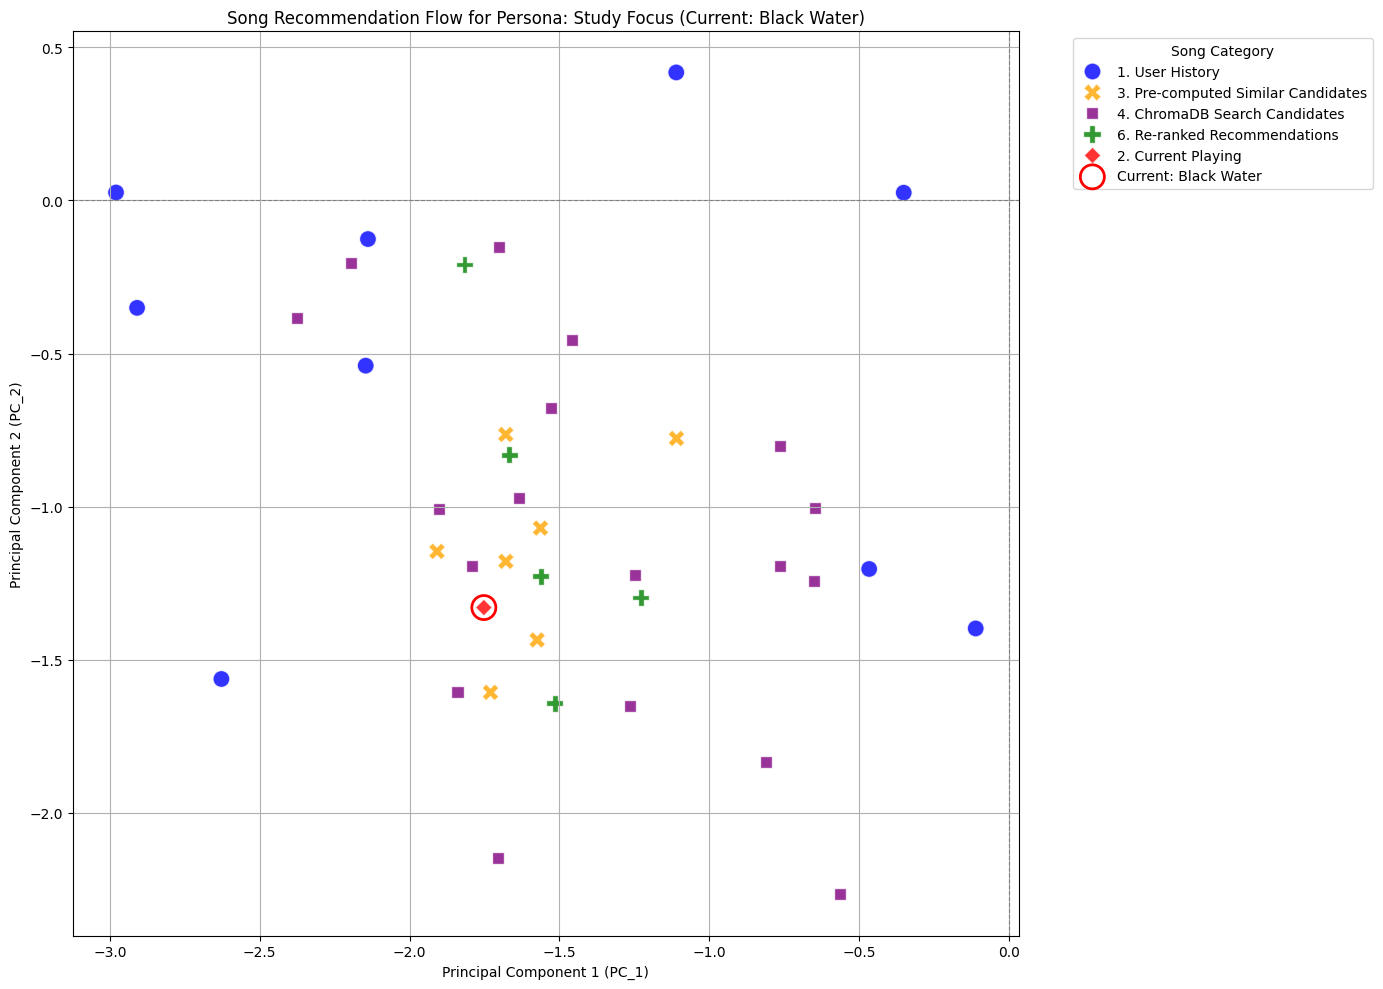

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Configuration --- #
# Choose a persona and a song from their history to visualize
selected_persona_name = "Study Focus"  # e.g., "Study Focus", "Party Animal", "Chill Vibes", "Workout Motivation"
current_song_index_in_history = 0    # Index of the song in the selected persona's history to act as 'current song'

# --- Data Loading and Preparation --- #

# 1. Get the selected persona's listening history
if selected_persona_name not in virtual_listening_histories:
    print(f"Error: Persona '{selected_persona_name}' not found.")
    exit()

persona_history = virtual_listening_histories[selected_persona_name]

if not persona_history:
    print(f"Error: Persona '{selected_persona_name}' has no listening history.")
    exit()

# 2. Identify the 'current playing song' from the history
if current_song_index_in_history >= len(persona_history):
    print(f"Error: current_song_index_in_history ({current_song_index_in_history}) is out of bounds for persona '{selected_persona_name}' history (length {len(persona_history)}).")
    exit()

current_song_info = persona_history[current_song_index_in_history]
current_song_track_id = current_song_info['track_id']

# 3. Get recommendations and all intermediate candidate IDs using the rank_and_filter_recommendations function
# Assuming rank_and_filter_recommendations is available in the global scope from pu9L-9VCYaK9
recommended_songs_details, llm_explanation, precomputed_similar_ids, chromadb_candidate_ids, final_llm_candidates = rank_and_filter_recommendations(selected_persona_name, current_song_track_id, n_recommendations=5)

# Extract track_ids from the final recommendations
ranked_recommendation_ids = [s['track_id'] for s in recommended_songs_details]

# 4. Prepare data for plotting

# Get PCA features for all relevant songs
pca_features_df = df_pca[['track_id', 'PC_1', 'PC_2']].copy()

# Filter for history songs
history_track_ids = [s['track_id'] for s in persona_history]
plotting_df_history = pca_features_df[pca_features_df['track_id'].isin(history_track_ids)].copy()
plotting_df_history['category'] = '1. User History'

# Filter for current song
plotting_df_current = pca_features_df[pca_features_df['track_id'] == current_song_track_id].copy()
plotting_df_current['category'] = '2. Current Playing'

# Filter for pre-computed similar items candidates
plotting_df_precomputed = pca_features_df[pca_features_df['track_id'].isin(precomputed_similar_ids)].copy()
plotting_df_precomputed['category'] = '3. Pre-computed Similar Candidates'

# Filter for ChromaDB search candidates
plotting_df_chromadb = pca_features_df[pca_features_df['track_id'].isin(chromadb_candidate_ids)].copy()
plotting_df_chromadb['category'] = '4. ChromaDB Search Candidates'

# Filter for final unique candidates before LLM re-ranking
# plotting_df_final_candidates = pca_features_df[pca_features_df['track_id'].isin(final_llm_candidates)].copy()
# plotting_df_final_candidates['category'] = '5. Final Unique Candidates for LLM'

# Filter for re-ranked and filtered recommendations
plotting_df_ranked_recs = pca_features_df[pca_features_df['track_id'].isin(ranked_recommendation_ids)].copy()
plotting_df_ranked_recs['category'] = '6. Re-ranked Recommendations'

# Combine all dataframes for plotting
combined_plotting_df = pd.concat([
    plotting_df_history,
    plotting_df_precomputed,
    plotting_df_chromadb,
    # plotting_df_final_candidates, # Excluded as per user request
    plotting_df_ranked_recs,
    plotting_df_current # Current song should be on top for highlighting
])

# Ensure unique entries for plotting (e.g., a song might appear in multiple categories)
# Keep the 'most specific' category if a song belongs to multiple (e.g., current song in history)
category_order = {
    'User History': 1,
    'Pre-computed Similar Candidates': 2,
    'ChromaDB Search Candidates': 3,
    # '5. Final Unique Candidates for LLM': 4, # Excluded as per user request
    'Re-ranked Recommendations': 5,
    'Current Playing': 6  # Highest priority to be on top
}

combined_plotting_df['category_rank'] = combined_plotting_df['category'].map(category_order)
combined_plotting_df.sort_values(by='category_rank', inplace=True)
combined_plotting_df.drop_duplicates(subset=['track_id'], keep='last', inplace=True) # Keep the highest ranked category

# --- Visualization --- #
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=combined_plotting_df,
    x='PC_1',
    y='PC_2',
    hue='category',
    style='category',
    s=150, # size of points
    alpha=0.8,
    palette={
        'User History': 'blue',
        'Pre-computed Similar Candidates': 'orange',
        'ChromaDB Search Candidates': 'purple',
        # '5. Final Unique Candidates for LLM': 'brown', # Excluded as per user request
        'Re-ranked Recommendations': 'green',
        'Current Playing': 'red'
    }
)

# Highlight the current playing song with a larger marker
current_song_plot_data = combined_plotting_df[combined_plotting_df['track_id'] == current_song_track_id]
plt.scatter(
    current_song_plot_data['PC_1'],
    current_song_plot_data['PC_2'],
    s=300, # Larger size
    facecolors='none', # No fill
    edgecolors='red', # Red border
    linewidths=2,
    label=f"Current: {current_song_info['track_name']}"
)

plt.title(f'Song Recommendation Flow for Persona: {selected_persona_name} (Current: {current_song_info["track_name"]})')
plt.xlabel('Principal Component 1 (PC_1)')
plt.ylabel('Principal Component 2 (PC_2)')
plt.legend(title='Song Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


## 第四層：展示與整合層 (Interface & Integration Layer)
目標：將後端邏輯包裝成可展示的 Demo。

### 1. 簡易 UI 開發
建立簡單介面（如 Streamlit），包含：選擇 Persona 下拉選單、輸入當前想聽的歌（或心情）。

### 2. 系統整合與除錯
將資料層、檢索層與代理人層整合。確認輸入一首歌後，系統能跑完流程並產出推薦,。

### 3. Demo 腳本準備
準備 2-3 個特定的測試案例（例如：「從高能量轉向專注模式」），確保 Demo 時能展現 RAG 的推理能力,。